# <span style="color:Purple">Spatial Analysis for Transportation Safety: </span>
# <span>Supporting Transportation Safety Road Design with Spatial Analysis in ArcGIS</span>

Author: Alberto Nieto, Esri

Version: 6

Last Changes: January 18, 2019 

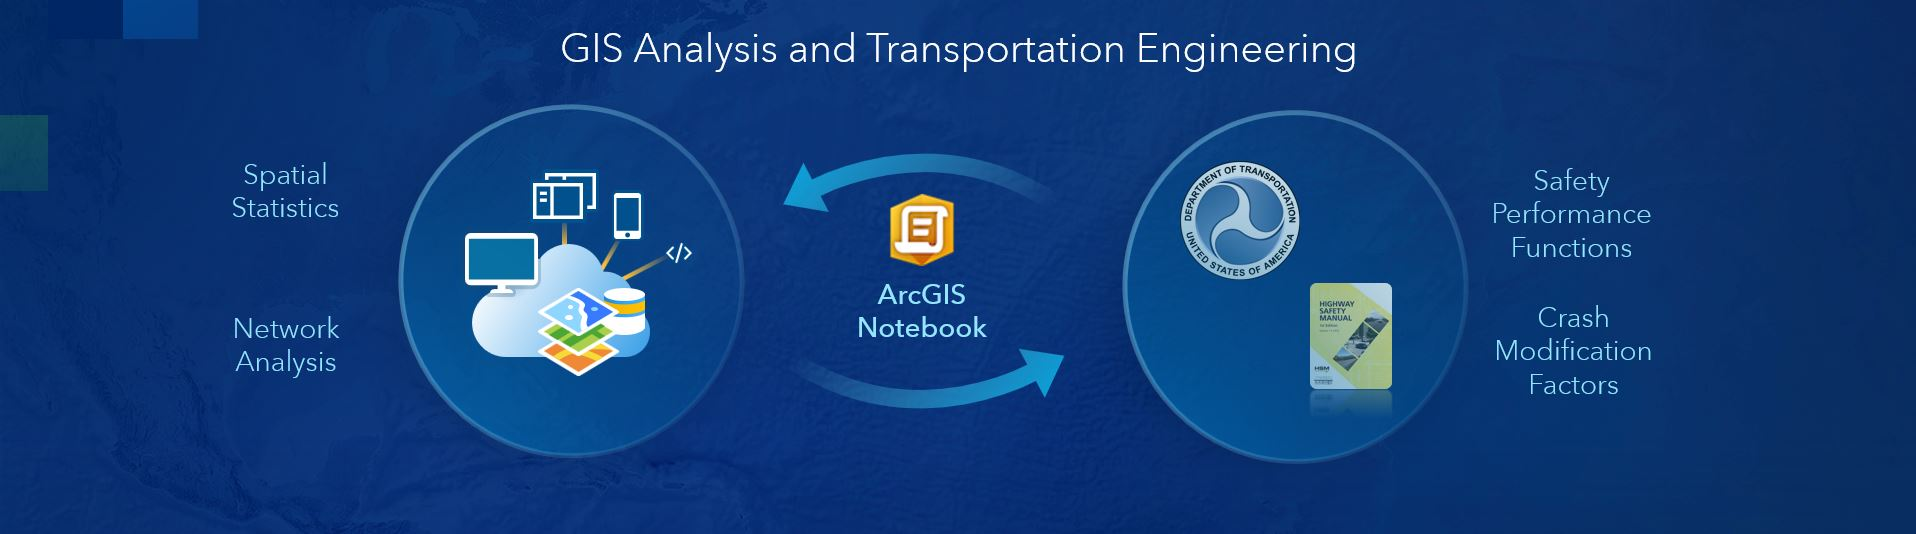

## Abstract

Transportation safety continuously strives to answer the following question:

##### <span style="color:Navy">"Where does the transportation network contain road segments with systemic problems leading to harmful traffic accidents, and what should we do about it?"</span>

The AASHTO Highway Safety Manual (HSM) created by the Federal Highway Administration (FHWA) in partnership with State and Local transportation agencies helps organizations answer this question via a road safety management process that is characterized by four steps:

1. Network Screening
2. Diagnosis and Countermeasure Selection
3. Economic Appraisal and Prioritization
4. Safety Effectiveness Evaluation

Network Screening can be broadly defined the process for reviewing a transportation network to identify and rank sites from most likely to least likely to realize a reduction crash frequency with implementation of a countermeasure. 

Diagnosis and Countermeasure Selection broadly describes the process of analyzing and testing different countermeasure possibilities to find the right solution for the site. 

We propose that Spatial Analysis in ArcGIS can help supplement these two steps and that further evaluation in a future timeframe may help us also address Economic Appraisal and Prioritiziation and Safety Effectiveness Evaluation. The way in which Spatial Analysis is proposed as a contributing factor to the success of this program is with the following:

1. Spatial Analysis in ArcGIS can help the network screening step to "Establish Focus" by measuring geographic distributions of harmful traffic accident events and helping answer where and which traffic accidents are most prevalent in a study area. This process can be broadly accomplished through use of:
    1. Data visualization techniques to understand WHICH events are most frequent. 
    2. Density-based Clustering to understand WHERE these events are most dense spatially.
    3. Geographic distribution measurement techniques to understand and quanitify HOW significant each clustered pattern is in the study area. 

2. ArcGIS can help in the diagnostic and countermeasure selection process by helping visualize and communicate the concept of Countermeasure Modification Factors(CMF), with maps for each type of crash and the associated CMF value for each road segment.
    1. Map of CMF effectiveness by road.
        Ex: Load specific CMF (i.e. rumble strips), select specific type of crash, load segments 

Our proposal is not meant to replace or undermine the existing Network Screening and Countermeasure Selection procedures, but rather to provide an efficient and repeatable framework that can supplement these two steps with insights and further information extracted through spatial analysis. The application and further use of this framework is recommended and meant to be further refined in collaboration with federal, state, and local agencies through actual application.

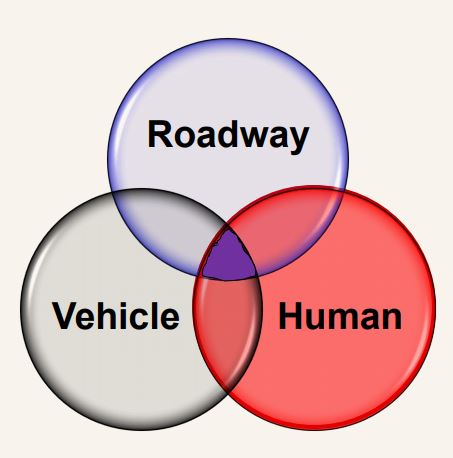

## Methodology

The approach described in this notebook can be organized in a sequence of three steps:

1. Establish Focus for Network Screening via GIS Analysis
2. Network Screening
3. CMF Visualization and Exploration

## <span style="color:Navy">Step 1: </span><span> Establish Focus for Network Screening via GIS Analysis </span>

Spatial Analysis in ArcGIS can help the network screening step to "Establish Focus" by measuring geographic distributions of harmful traffic accident events and helping answer where and which traffic accidents are most prevalent in a study area. This process can be broadly accomplished through use of:
    1. Data visualization techniques to understand WHICH events are most frequent. 
    2. Density-based Clustering to understand WHERE these events are most dense spatially.
    3. Geographic distribution measurement techniques to understand and quanitify HOW significant each clustered pattern is in the study area. 

### Defining, Finding, and Describing Spatial Clusters of Accident Events

When considering the question of finding a "systemic problem" on the transportation network, a useful aspect to consider is the spatial distribution of problematic events, such as traffic accidents. A useful evaluation of what type of problem a state should focus on is the degree of clustering for each type of accident. The case is made that a cluster of traffic accident locations is highly suggestive of the presence of a systemic problem in the transportation network, and if a study area experiences stronger accidents of a certain type, then that type should be the focus of the rest of the HSM procedure.

##### Appendix: Density-based Clustering Approach

Spatial clusters in point data can be found via the Density-based Clustering tool in ArcGIS: a geoprocessing and web-service enabled tool that processes point data and designates each event as either part of a cluster or "noise". The tool can leverage three algorithms to determine the definition of a cluster and assignment logic: DBSCAN, HDBSCAN, and OPTICS. This approach evaluates each algorithm and attempts to set a starting baseline for an analysis framework that can be repeated for most states in the United States. Further elaboration on the definition and designation of clusters is recommended for local agencies and continued use of this approach. 

Finding clusters is only useful to help find potentially dangerous locations (given a specific definition of a cluster), and the approach recommends an additional step: spatial and non-spatial measurements of the characteristics of each cluster of accidents to help rank each site. To this end, the following descriptive measurements are recorded for each site:

#### Spatial:
- Calculating the average distance between features (nearest neighbor index)
- Counting the number of features within defined distances (Ripley's K-statistic)
- Overlaying areas of equal size (quadrant analysis)
- Cluster confidence (Density-based Clustering messaging)

#### Aspatial: 
- Cluster harm event homogeneity: How similar is the harm cause of all the accidents in the cluster? 
- Road segment characteristics
    - Road segment traffic volume
    - Road segment sinuosity
    - Road segment out-of-context curve
    - Road segment speed limit
    - Road segment guard
    - Road segment signage
- Temporal characteristics
    - Seasonality of events
    - Day of events
    - Time of events

### Data

The following datasets are used for a basic assessment of this workflow:

- **Fatal Accident Crash locations in Maryland (Federal):**
    - Source: NHTSA FARS
    - Extent: Maryland
    - Time: 2002 to 2016
    - Crash Type: Fatal accidents
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=89116fe5f52e429f9f2eaace87084739
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/FARS_Accidents_in_Maryland_2002_to_2016/FeatureServer


- **Accident Crash locations in Maryland (State):**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014
    - Crash Type: All types
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=89116fe5f52e429f9f2eaace87084739
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/FARS_Accidents_in_Maryland_2002_to_2016/FeatureServer


- **Roads: Maryland Interstate Polylines (HPMS AADT Segmentation)**
    - Source: FHWA Highway Performance Management System (HPMS)
    - Extent: Maryland
    - Time: 2016 AADT
    - Includes HPMS Polyline segments derived from AADT for Maryland
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=597913c0a2344684896e0c6d1e14040e
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Interstates_HPMS/FeatureServer
    

- **Roads: Maryland Interstate Points (0.1 Mile Segmentation)**
    - Source: FHWA Highway Performance Management System (HPMS) and ArcGIS geoprocessing
    - Extent: Maryland
    - Time: 2016 AADT
    - Includes HPMS point segments derived from AADT for Maryland with assigned crash rates from 2016 FARS.
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=af6515f1f1ed4ffaa6b5cda3e57aecdd
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/HPMS_Point_Segments_Maryland/FeatureServer


- **Analyzed Roads: All Maryland Roads**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014 AADT
    - Includes HSM/USRAP Crash Rate Risk outputs from Solution Template for all Maryland Roads
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=eafe5ab24b2747279b06c220125c4c22
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Crash_Rate_Risk/FeatureServer
    

- **Analyzed Roads: Maryland Interstates Result from Crash Analysis Solution**
    - Source: https://solutions.arcgis.com/local-government/help/crash-analysis/
    - Extent: Maryland
    - Time: 2010 to 2014 AADT
    - Includes HSM/USRAP Crash Rate Risk outputs from Solution Template for _just Maryland Interstates_.
    - Item: https://esrifederal.maps.arcgis.com/home/item.html?id=eafe5ab24b2747279b06c220125c4c22
    - REST Endpoint: https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/Maryland_Crash_Rate_Risk/FeatureServer
    
    
    
- **Crash Modification Factors Listings**
    - Source: http://www.cmfclearinghouse.org/index.cfm
    - Extent: Non-spatial data, but applicable to United States
    - Time: Non-temporal data
    - Includes Crash Modification Factor (CMF) listings for safety countermeasures that have been studied. 
    - Item location: '/../data/cmf_listings.xls'
    
    
- **Crash Costs Summary Table**
    - Source: http://www.cmfclearinghouse.org/collateral/ServiceLife_and_CrashCostUserGuide/Crash%20Cost%20Summary%20Table.xlsx
    - Extent: Non-spatial data, but applicable to United States
    - Time: Non-temporal data
    - Includes associated costs with traffic accidents of different types for each state based on studies. 
    - Item location: '/../data/CrashCosts_FHWA.xlsx'

The following code cells in this notebook are used to retrieve, examine, and confirm the availability of each dataset. 

### Preliminary Setup

This segment of the notebook contains python code that accesses the needed modules and functions to perform our analysis. Any supplemental custom functions that are used in this process, such as a function to quickly plot a map and histogram, are also created and stored in this section.

#### Import the needed modules, including ArcPy, the ArcGIS API for Python, and other useful modules

In [414]:
import arcpy
arcpy.env.overwriteOutput = True
import arcgis
from arcgis import features
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geoenrichment import *
from arcgis.geometry import project
from arcgis.mapping import WebMap
import os
import time
import math
import datetime
from IPython.display import display

In [415]:
# Imports for plotting 
import numpy as np

import seaborn as sns

import bokeh
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
from bokeh.models import Legend, Range1d
from bokeh.embed import file_html
from bokeh.resources import CDN
# from bokeh.charts import Bar, Histogram, output_file, show  # For bar, histogram charts
# Set bokeh to output plots in the notebook
output_notebook()

Loading BokehJS ...

In [416]:
homegis = arcgis.gis.GIS("home")

In [417]:
# gis = arcgis.gis.GIS("home", verify_cert=False)
gis = arcgis.gis.GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal", verify_cert=False)

Enter password: ········


In [418]:
if not os.path.isdir("/arcgis/home/anieto"):
    os.mkdir(r"/arcgis/home/anieto")
if not os.path.isdir(r"/arcgis/home/anieto/workspace"):
    os.mkdir(r"/arcgis/home/anieto/workspace")
if not os.path.isdir(r"/arcgis/home/anieto/data"):
    os.mkdir(r"/arcgis/home/anieto/data")

In [419]:
# Set and Change directory to workspace
workspace_dir = r"/arcgis/home/anieto/workspace"
data_dir = r"/arcgis/home/anieto/data"

arcpy.env.overwriteOutput = True
# Create a temporary file geodatabase on disk
if arcpy.Exists(os.path.join(workspace_dir, "maryland_analysis.gdb")):
    workspace_fgdb = os.path.join(workspace_dir, "maryland_analysis.gdb")
else:
    workspace_fgdb = arcpy.CreateFileGDB_management(workspace_dir, "maryland_analysis").getOutput(0)

### Data Retrieval

#### Crash Data:

<Item title:"Traffic Accidents in Maryland 2002 to 2016" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
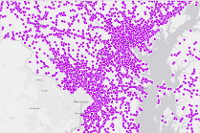

In [420]:
crashes_fars_item = gis.content.search("Traffic Accidents in Maryland 2002 to 2016", item_type="Feature Service")[0]
crashes_fars_item

<Item title:"Maryland Crash Locations_Light" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
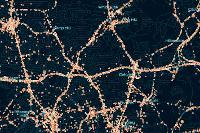

In [421]:
crashes_maryland_item = gis.content.search("Maryland Crash Locations Light", item_type="Feature Service")[0]
crashes_maryland_item

#### Roadway Data:

<Item title:"Maryland_Interstates_HPMS" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
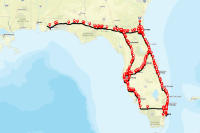

In [422]:
roads_maryland_interstate_polylines_item = gis.content.search("Maryland_Interstates_HPMS", item_type="Feature Service")[-1]
roads_maryland_interstate_polylines_item

<Item title:"HPMS_Point_Segments_Maryland" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
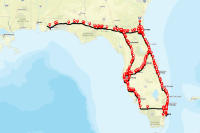

In [423]:
roads_maryland_interstate_points_item = gis.content.search("HPMS_Point_Segments_Maryland", item_type="Feature Service")[0]
roads_maryland_interstate_points_item

<Item title:"Maryland_Routes_Baseline" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
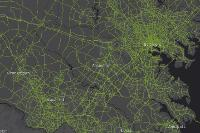

In [424]:
routes_maryland_baseline_item = gis.content.search("Maryland_Routes_Baseline", item_type="Feature Service")[0]
routes_maryland_baseline_item

<Item title:"Maryland_Routes_Baseline_VT" type:Vector Tile Layer owner:albe9057@esri.com_esrifederal>
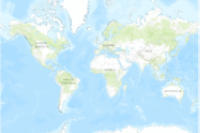

In [425]:
routes_maryland_baseline_vt_item = gis.content.search("Maryland_Routes_Baseline_VT", item_type="Vector Tile Service")[0]
routes_maryland_baseline_vt_item

<Item title:"Maryland Roads with Crash Rate Risk" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
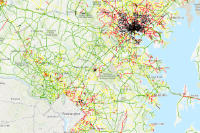

In [426]:
analysisroads_allmd_item = gis.content.search("Maryland Roads with Crash Rate Risk", item_type="Feature Service")[0]
analysisroads_allmd_item

<Item title:"Routes_wFHWACrashRate_forMVTFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
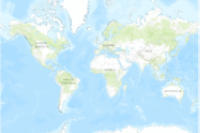

In [427]:
routes_fhwans_mvtcrashes_item = gis.content.search("Routes_wFHWACrashRate_forMVTFatalCrashes", item_type="Feature Service")[0]
routes_fhwans_mvtcrashes_item

<Item title:"Routes_wFHWACrashRate_forPedestrianFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
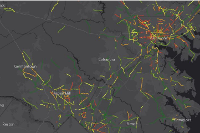

In [428]:
routes_fhwans_pedestriancrashes_item = gis.content.search("Routes_wFHWACrashRate_forPedestrianFatalCrashes", item_type="Feature Service")[0]
routes_fhwans_pedestriancrashes_item

<Item title:"Routes_wFHWACrashRate_forTreeFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
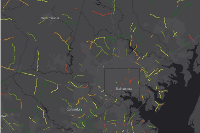

In [429]:
routes_fhwans_treecrashes_item = gis.content.search("Routes_wFHWACrashRate_forTreeFatalCrashes", item_type="Feature Service")[0]
routes_fhwans_treecrashes_item

#### Crashes Dataset

In [430]:
# Convert the items into spatially-enabled dataframes
crashes_fars_sedf = pd.DataFrame.spatial.from_layer(crashes_fars_item.layers[0])
crashes_fars_sedf.head()

,ALIGNMNT,ARR_HOUR,ARR_MIN,A_CRAINJ,A_CT,A_D15_19,A_D15_20,A_D16_19,A_D16_20,A_D16_24,...,WEATHER,WEATHER1,WEATHER2,WRK_ZONE,X,X_Y_VALID,Y,YEAR,YEAR_TEXT,latitude
0,1,99,99,1,3,2,2,2,2,1,...,2,0,0,0,-76.110964,1,39.578481,2003,2003,39.578481
1,1,99,99,1,1,2,2,2,2,2,...,2,0,0,0,-76.286486,1,39.466642,2003,2003,39.466642
2,1,99,99,1,1,2,2,2,2,2,...,1,0,0,0,-77.166225,1,39.359514,2003,2003,39.359514
3,2,99,99,1,1,2,2,2,2,1,...,9,0,0,0,-76.639047,1,39.546289,2003,2003,39.546289
4,1,99,99,1,1,1,1,1,1,1,...,2,0,0,0,-76.807358,1,38.898033,2003,2003,38.898033


In [431]:
crashes_fars_sedf.shape

(7734, 115)

Here's the basic view and shape (number of rows and columns) of our table. The table has several columns (115), so let's investigate the columns in the data a bit closer and keep only the ones we need to answer our question:

In [432]:
crashes_fars_sedf.columns.tolist()

['ALIGNMNT',
 'ARR_HOUR',
 'ARR_MIN',
 'A_CRAINJ',
 'A_CT',
 'A_D15_19',
 'A_D15_20',
 'A_D16_19',
 'A_D16_20',
 'A_D16_24',
 'A_D21_24',
 'A_D65PLS',
 'A_DIST',
 'A_DOW',
 'A_DROWSY',
 'A_HR',
 'A_INTER',
 'A_INTSEC',
 'A_JUNC',
 'A_LT',
 'A_MANCOL',
 'A_MC',
 'A_PED',
 'A_PEDAL',
 'A_PEDAL_F',
 'A_PED_F',
 'A_POLPUR',
 'A_POSBAC',
 'A_RD',
 'A_REGION',
 'A_RELRD',
 'A_ROADFC',
 'A_ROLL',
 'A_RU',
 'A_SPCRA',
 'A_TOD',
 'BIA',
 'CF1',
 'CF2',
 'CF3',
 'CITY',
 'COUNTY',
 'C_M_ZONE',
 'DATE',
 'DATETIME',
 'DATETIME_2',
 'DAY',
 'DAY_TEXT',
 'DAY_WEEK',
 'DRUNK_DR',
 'FATALS',
 'FUNC_SYS',
 'HARM_EV',
 'HIT_RUN',
 'HOSP_HR',
 'HOSP_MN',
 'HOUR',
 'HOUR_TEXT',
 'INDIAN_RES',
 'LGT_COND',
 'LONGITUDE',
 'MAN_COLL',
 'MILEPT',
 'MINUTE',
 'MINUTE_TEXT',
 'MONTH',
 'MONTH_TEXT',
 'NHS',
 'NOT_HOUR',
 'NOT_MIN',
 'NO_LANES',
 'OBJECTID',
 'PAVE_TYP',
 'PEDS',
 'PERMVIT',
 'PERNOTMVIT',
 'PERSONS',
 'PROFILE',
 'PVH_INVL',
 'RAIL',
 'RD_OWNER',
 'RELJCT1',
 'RELJCT2',
 'REL_JUNC',
 'REL_ROAD

FARS Documentation: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812602

The full allotment of attributes in this table will be useful for several workflows, but for the purposes of this exercise, let's consider which aspects of the crash data we actually need: 

In [433]:
needed_fields = [
    "SHAPE",
    "STATE",
    "COUNTY",
    "PERSONS",
    "PEDS",
    "ROAD_FNC",
    "HARM_EV", 
    "MAN_COLL", # Manner of collision (i.e. rear-end)
    "REL_ROAD", # Relation to road (i.e. On roadway, shoulder)
    "LGT_COND", # Light condition (i.e. Daylight, dark)
    "WEATHER", 
    "WEATHER1",
    "WEATHER2",
    "WRK_ZONE",
    "FATALS",
    "DAY_WEEK",
    "DRUNK_DR",
    "TWAY_ID",
    "RAIL",
    "latitude",
    "LONGITUDE",
    "A_RU", # Land use (i.e. Rural/Urban)
    "A_RD", # Involving a roadway departure
    "A_CT", # Crash type
    "A_LT", # Involving a large truck
    "A_MC", # Involving a motorcycle
    "A_SPCRA", # Involving speeding
    "A_PED", # Involving a pedestrian
    "A_PEDAL", # Involving a pedalcyclist
    "A_ROLL", # Involving a rollover
    "A_POLPUR", # Involving a police pursuit
    "A_POSBAC", # Involving a driver with a positive BAC test result
    "A_D15_19", # Crashes Involving a Young Driver (Aged 15-19)
    "A_D15_20", # Crashes Involving a Young Driver (Aged 15-20)
    "A_D16_19", # Crashes Involving a Young Driver (Aged 16-19)
    "A_D16_20", # Crashes Involving a Young Driver (Aged 16-20)
    "A_D16_24", # Crashes Involving a Young Driver (Aged 16-24)
    "A_D21_24", # Crashes Involving a Young Driver (Aged 21-24)
    "A_D65PLS", # Crashes Involving an Older Driver (Aged 65+)
    "A_DIST", # Involving a distracted driver
    "A_DROWSY", # Involving a drowsy driver
    "YEAR_TEXT",
    "MONTH_TEXT",
    "DAY_TEXT",
    "HOUR_TEXT",
    "MINUTE_TEXT",
    "DATE",
    "DATETIME_2",
]

In [434]:
# Select our data by the list of columns we need
crashes_fars_sedf = crashes_fars_sedf[needed_fields]
crashes_fars_sedf.shape

(7734, 48)

We are left with 7,734 fatal accidents in Maryland roadways between 2002 and 2016. Let's quickly confirm by plotting these on a map along with the Maryland roadways.

### Map Data Visualization

In [542]:
verif_map = gis.map("Maryland")
verif_map.basemap = 'gray'
# verif_map.add_layer(roads_maryland_interstate_polylines_item)
crashes_fars_sedf.spatial.plot(map_widget=verif_map)
verif_map

MapView(layout=Layout(height='400px', width='100%'))

### Data visualization techniques to understand WHICH events are most frequent:

The FHWA Network Screening process works. What we need to help with is with understanding which type of crash event matters for each study area. Since we're working with Maryland data, we need to understand which type of crash event is most significant in Maryland. 

To start, let's explore using tables, charts, and graphs. 

#### Tabular Data Visualization

To explore the tabular aspects of this dataset, we'll use a python module called Pandas, and a data object called a dataframe. Dataframes are very efficient ways to store and perform calculations on tabular data inside python. To maintain the spatial aspects of the dataframe, we'll use the concept of a spatially-enabled dataframe, which allows spatial operations and easy plotting on maps (using the Arcpy spatial engine if possible)

In [437]:
crashes_fars_sedf.head()

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_D65PLS,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,2,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00


One of the columns in this data, 'HARM_EV', contains the cause of the fatal accident, but it contains coded values that are difficult to immediately interpret. Let's use the [metadata documentation](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812602) and a python dictionary to make a data crosswalk that can help us easily interpret the causes of these accidents.

In [438]:
harm_ev_lookup_dict = {
    "1": "Rollover/Overturn",
    "2": "Fire/Explosion",
    "3": "Immersion",
    "4": "Gas Inhalation",
    "5": "Fell/Jumped from Vehicle",
    "6": "Injured in Vehicle",
    "7": "Other Non-Collision",
    "8": "Pedestrian",
    "9": "Pedalcyclist",
    "10": "Railway Vehicle",
    "11": "Live Animal",
    "12": "Motor Vehicle in Transport",
    "13": "Motor Vehicle in Transport on Other Roadway",
    "14": "Parked Motor Vehicle (Not in Transport)",
    "15": "Non-Motorist on Personal Conveyance",
    "16": "Thrown or Falling Object",
    "17": "Boulder",
    "18": "Other Object (Not Fixed)",
    "19": "Building",
    "20": "Impact Attenuator/Crash Cushion",
    "21": "Bridge Pier or Support",
    "22": "Bridge Parapet End",
    "23": "Bridge Rail",
    "24": "Guardrail Face",
    "25": "Concrete Traffic Barrier",
    "26": "Other Traffic Barrier",
    "27": "Highway/Traffic Sign Post",
    "28": "Overhead Sign Support/Sign",
    "29": "Luminary/Light Support",
    "30": "Utility Pole/Light Support",
    "31": "Post, Pole, or Other Supports",
    "32": "Culvert",
    "33": "Curb",
    "34": "Ditch",
    "35": "Embankment",
    "36": "Embankment - Rock, Stone, or Concrete",
    "37": "Embankment - Material Type Unknown",
    "38": "Fence",
    "39": "Wall",
    "40": "Fire Hydrant",
    "41": "Shrubbery",
    "42": "Tree (Standing Only)",
    "43": "Other Fixed Object",
    "44": "Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",
    "45": "Working Motor Vehicle",
    "46": "Traffic Signal Support",
    "47": "Vehicle Occupant Struck or Run Over by Own Vehicle",
    "48": "Snow Bank",
    "49": "Ridden Animal or Animal-Drawn Conveyance",
    "50": "Bridge Overhead Structure",
    "51": "Jackknife",
    "52": "Guardrail End",
    "53": "Mail Box",
    "54": "Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle In-Transport",
    "55": "Motor Vehicle in Motion Outside the Trafficway",
    "57": "Cable Barrier",
    "58": "Ground",
    "59": "Traffic Sign Support",
    "72": "Cargo/Equipment Loss or Shift (Harmful to This Vehicle)",
    "73": "Object Had Fallen From Motor Vehicle In-Transport",
    "74": "Road Vehicle on Rails",
    "91": "Unknown Object Not Fixed",
    "93": "Unknown Fixed Object",
    "98": "Not Reported (2010 Only)",
    "99": "Unknown"
}

In [439]:
def get_crash_cause_text(code):
    if not isinstance(code, str):
        code = str(code)
    if code not in harm_ev_lookup_dict:
        return "Unknown (Code: {0})".format(str(code))
    return harm_ev_lookup_dict[code]

In [440]:
crashes_fars_sedf.head()

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_D65PLS,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,2,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00


In [441]:
# crashes_q_sedf['Cause'] = crashes_q_sedf.apply(lambda x: get_crash_cause_text(x['HARM_EV']), axis=1)
crashes_fars_sedf['Cause'] = crashes_fars_sedf.apply(lambda x: get_crash_cause_text(x['HARM_EV']), axis=1)

In [442]:
crashes_fars_sedf.head()

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2,Cause
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00,Motor Vehicle in Transport
1,"{""x"": -8492172.788118284, ""y"": 4788736.1271743...",24,25,2,1,11,8,0,1,2,...,2,2,2003,1,3,1,0,2003-01-03,2003-01-03 01:00:00,Pedestrian
2,"{""x"": -8590104.873420665, ""y"": 4773300.4701861...",24,13,1,0,1,37,0,6,2,...,2,2,2003,1,3,22,3,2003-01-03,2003-01-03 22:03:00,Embankment - Material Type Unknown
3,"{""x"": -8531419.711457718, ""y"": 4800227.6152805...",24,5,1,0,6,34,0,6,9,...,2,2,2003,1,4,13,7,2003-01-04,2003-01-04 13:07:00,Ditch
4,"{""x"": -8550156.018425096, ""y"": 4707076.2290324...",24,33,3,0,13,1,0,1,3,...,2,2,2003,1,4,22,30,2003-01-04,2003-01-04 22:30:00,Rollover/Overturn


## <span style="color:Navy">Step 1: </span><span> Establish Focus </span>

### Hypothesis Test 1: Should Maryland spend money on roadway safety countermeasures?

Default Action (commit to doing if we stay ignorant): Don't spend money on road safety countermeasures in Maryland. 

Alternate Action: Spend money on road safety countermeasures in Maryland.

Null Hypothesis (H0): Crashes in Maryland are not dispersed and occur due to random occurrences. 

Alternative Hypothesis (H1): Crashes in Maryland are clustered and occur due to systemic problems. 

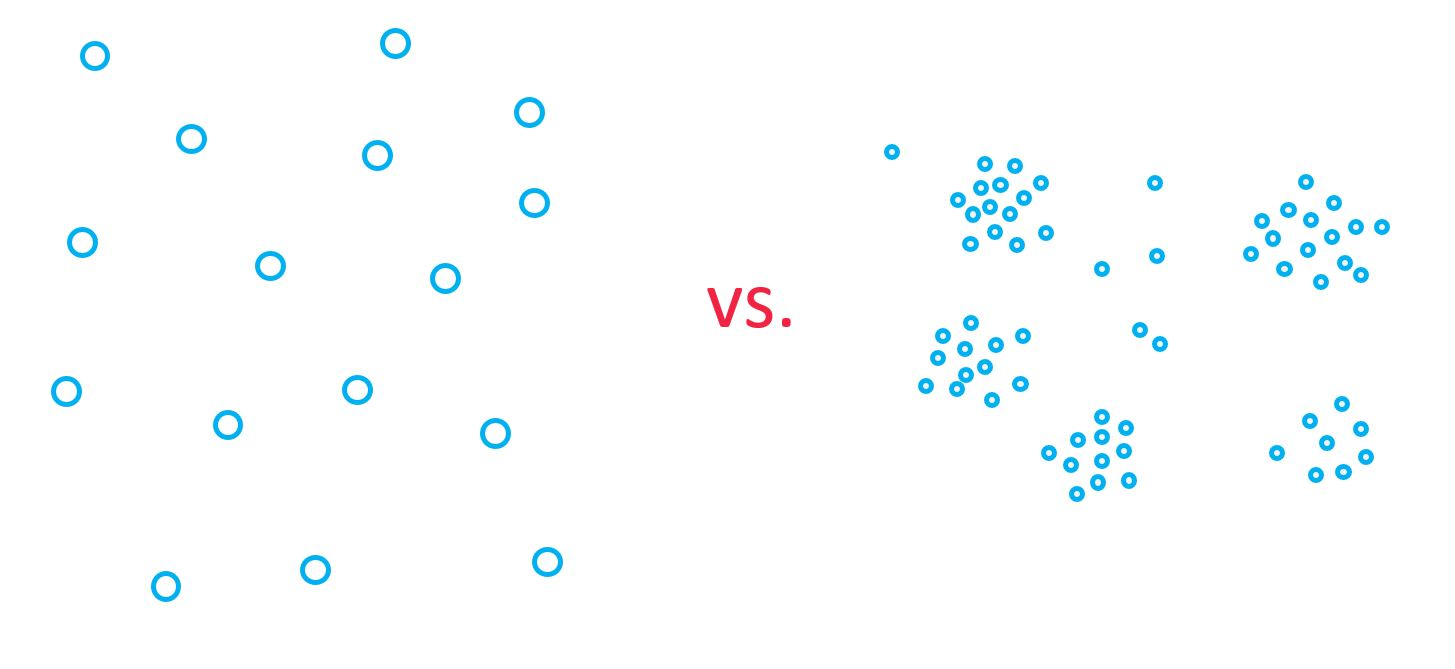

### TODO #1: Density-based Clustering by crash type to separate input accident locations into clusters and noise. 

Data: FARS 2002 to 2016 Maryland

### Density-based Clustering: Finds clusters of traffic accidents by type

![clustering](https://github.com/Qberto/arcgispythonapi_arcpy-spatial_statistics_examples/raw/5f8994ab80301d8ae145e9081b16c1389a5729d0/img/dbclustering_01.png "Density-based Clustering")

The [Density-based Clustering tool](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/how-density-based-clustering-works.htm) works by detecting areas where points are concentrated and where they are separated by areas that are empty or sparse. Points that are not part of a cluster are labeled as noise.



### Standard Distance: Measures cluster geographic distribution to determine which accident types we should focus on

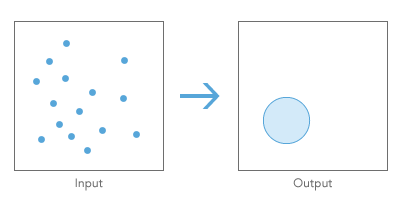

The [Standard Distance Tool](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/h-how-standard-distance-spatial-statistic-works.htm) works by measuring the compactness of a distribution and provides a single value representing the dispersion of features around the center. 

The value is a distance, so the compactness of a set of features can be represented on a map by drawing a circle or a sphere with the radius equal to the standard distance value. The Standard Distance tool creates a circle polygon or a multipatch sphere if your data is z enabled.

### TODO #2: Directional Distribution by crash type to measure intensity of clustering

Data: Output from TODO #1

In [546]:
crashes_map = gis.map("Maryland")
crashes_map.add_layer(crashes_fars_item)
crashes_map.basemap = 'gray'
crashes_map

MapView(layout=Layout(height='400px', width='100%'))

In [444]:
data = crashes_fars_sedf
type_field = "Cause"

In [445]:
# Check if crash type summary stats have already been determined
if os.path.exists(os.path.join(workspace_dir, "crash_type_summary_stats.csv")):
    crash_type_summary_stats = pd.read_csv(os.path.join(workspace_dir, "crash_type_summary_stats.csv"))
    
else:

    # Set dataframe for cluster summary statistics
    crash_type_summary_stats = pd.DataFrame(columns=["Cause", 
                                                     "Total Count", 
                                                     "Clustered Count", 
                                                     "Noise Count", 
                                                     "Std. Distance Sum",
                                                     "Std. Distance Mean"
                                                    ])

    # Get list of unique causes from data
    unique_causes = data[type_field].unique().tolist()

    print("Retrieved {0} types of accidents in input data.".format(len(unique_causes)))
    print("Gathering measurements of spatial clustering...")

    # For each unique cause:
    for ix, cause in enumerate(unique_causes):
        print("\nStep {0} of {1}: Measuring spatial distribution of '{2}' accidents...".format(str(ix+1), 
                                                                                               str(len(unique_causes)), 
                                                                                               cause))

        # Create subset dataframe
        print("\tCreating subset data...")
        cause_df = data.loc[data[type_field] == cause]

        if cause_df.shape[0] > 4:

            # Save our input data into a temporary feature class on disk
        #     print("\tCreating subset feature class on local disk")
            crashes_fc = cause_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_crashes_fc"))

            # Run Density-based Clustering
            print("\tRunning Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...")
            output_clusters_path = "{0}//{1}_HDBSCAN".format(workspace_fgdb, "CrashClusters")
            hdbscan_result = arcpy.stats.DensityBasedClustering(crashes_fc, output_clusters_path, "HDBSCAN", 5)
            hdbscan_sedf = pd.DataFrame.spatial.from_featureclass(hdbscan_result.getOutput(0))

            cluster_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].shape[0]
            noise_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']==-1].shape[0]

            # Determine if clusters were produced
            if cluster_count != 0:

                # Parse out accidents that were members of a cluster and write to feature class
                clusters_fc = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_clusters_fc"))

            #     print("\tRunning Directional Distribution (Ellipses)...")
            #     # Run Ellipses
            #     output_ellipses_path = "{0}//{1}".format(workspace_fgdb, "CrashEllipses")
            #     ellipses_result = arcpy.stats.DirectionalDistribution(clusters_fc, output_ellipses_path, Case_Field='CLUSTER_ID')
            #     ellipses_sedf = pd.DataFrame.spatial.from_featureclass(ellipses_result.getOutput(0))

                print("\tRunning Standard Distance measurement...")
                output_stddistance_path = "{0}//{1}".format(workspace_fgdb, "CrashStdDistance")
                stddistance_result = arcpy.stats.StandardDistance(clusters_fc, output_stddistance_path, Case_Field='CLUSTER_ID')
                stddistance_sedf = pd.DataFrame.spatial.from_featureclass(stddistance_result.getOutput(0))
                std_distance_sum = stddistance_sedf.StdDist.sum()
                std_distance_mean = stddistance_sedf.StdDist.describe()['mean']

            else:
                print("\tAccident type did not produce HDBSCAN clusters.")
                std_distance_sum = None
                std_distance_mean = None

            # Publish output clusters
        #     print("Publishing output")

        else:
            print("\tAccident type produced {0} records... Skipping clustering sequence.".format(cause_df.shape[0]))
            cluster_count = None
            noise_count = None   
            std_distance_sum = None
            std_distance_mean = None        

        # Update summary stats for type
        crash_type_summary_stats = crash_type_summary_stats.append({'Cause': cause, 
                                                                    "Total Count": cause_df.shape[0], 
                                                                    "Clustered Count": cluster_count,
                                                                    "Noise Count": noise_count,
                                                                    "Std. Distance Sum": std_distance_sum,
                                                                    "Std. Distance Mean": std_distance_mean
                                                                   }, ignore_index=True)
        
        # Write to local file system
        crash_type_summary_stats.to_csv(os.path.join(workspace_dir, "crash_type_summary_stats.csv"))

In [547]:
for i in range(2, 1, -1):
    get_crash_type_rank_map(i, top_types_dict, use_ipython_display=True)

Rank 2 Spatial Clustering
Accident Type: Pedestrian


MapView(layout=Layout(height='400px', width='100%'))

In [446]:
crash_type_summary_stats

,Unnamed: 0,Cause,Total Count,Clustered Count,Noise Count,Std. Distance Sum,Std. Distance Mean
0,0,Motor Vehicle in Transport,3054,2058.0,996.0,417472.784401,2455.722261
1,1,Pedestrian,1446,1040.0,406.0,261009.174751,2932.687357
2,2,Embankment - Material Type Unknown,55,38.0,17.0,77398.852689,25799.617563
3,3,Ditch,121,117.0,4.0,119081.820301,59540.910150
4,4,Rollover/Overturn,298,281.0,17.0,143380.645033,47793.548344
5,5,Utility Pole/Light Support,293,174.0,119.0,134900.397119,9635.742651
6,6,Tree (Standing Only),788,518.0,270.0,296325.100983,6891.281418
7,7,Pedalcyclist,116,95.0,21.0,83827.198617,27942.399539
8,8,Highway/Traffic Sign Post,21,12.0,9.0,30921.447675,15460.723838
9,9,Wall,50,32.0,18.0,30227.483317,15113.741659


### TODO #3: Determine which crash types had most intense spatial clustering

#### TODO #3b: Use additional factors to determine how intense spatial clustering is for each type of accident (i.e. (std. distance mean * factor) + (amount of clusters * factor) + (amount of accidents * factor))

Data: Outputs from TODO #2

In [448]:
# Top Five most clustered accident types
crash_type_summary_stats.sort_values(by='Std. Distance Mean').head()

,Unnamed: 0,Cause,Total Count,Clustered Count,Noise Count,Std. Distance Sum,Std. Distance Mean
0,0,Motor Vehicle in Transport,3054,2058.0,996.0,417472.784401,2455.722261
1,1,Pedestrian,1446,1040.0,406.0,261009.174751,2932.687357
6,6,Tree (Standing Only),788,518.0,270.0,296325.100983,6891.281418
11,11,Guardrail Face,349,222.0,127.0,172209.763516,7487.381022
13,13,Parked Motor Vehicle (Not in Transport),148,83.0,65.0,64288.644917,9184.092131


In [449]:
top_types_dict = {
    "Rank_1":{},
    "Rank_2":{},
    "Rank_3":{},
    "Rank_4":{},
    "Rank_5":{},
}

print("Producing layers for most clustered accident types...")

top_causes = crash_type_summary_stats.sort_values(by='Std. Distance Mean').head()['Cause'].tolist()

# Produce data for the top five most clustered accident types
for ix, top_cause in enumerate(top_causes):
    print("\nStep {0} of {1}: Measuring spatial distribution of '{2}' accidents...".format(str(ix+1), 
                                                                                           str(len(top_causes)), 
                                                                                           top_cause))
    cause_df = data.loc[data[type_field] == top_cause]
    
    crashes_fc = cause_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "ranked{0}_acctype_fc".format(str(ix+1))))

    # Run Density-based Clustering
    print("\tRunning Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...".format(str(ix+1)))
    output_clusters_path = "{0}//{1}_HDBSCAN".format(workspace_fgdb, "ranked{0}_acctype_hdbscan_fc".format(str(ix+1)))
    hdbscan_result = arcpy.stats.DensityBasedClustering(crashes_fc, output_clusters_path, "HDBSCAN", 5)
    hdbscan_sedf = pd.DataFrame.spatial.from_featureclass(hdbscan_result.getOutput(0))

    cluster_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].shape[0]
    noise_count = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']==-1].shape[0]


    # Parse out accidents that were members of a cluster and write to feature class
    clusters_fc = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1].spatial.to_featureclass(os.path.join(workspace_fgdb, "ranked{0}_acctype_clusters_fc".format(str(ix+1))))

    print("\tRunning Standard Distance measurement...")
    output_stddistance_path = "{0}//{1}".format(workspace_fgdb, "ranked{0}_acctype_stddistance_fc".format(str(ix+1)))
    stddistance_result = arcpy.stats.StandardDistance(clusters_fc, output_stddistance_path, Case_Field='CLUSTER_ID')
    stddistance_sedf = pd.DataFrame.spatial.from_featureclass(stddistance_result.getOutput(0))
    
    top_types_dict["Rank_{0}".format(str(ix+1))]["cause_name"] = top_cause
    top_types_dict["Rank_{0}".format(str(ix+1))]["accidents_df"] = cause_df
    top_types_dict["Rank_{0}".format(str(ix+1))]["accidents_fc"] = crashes_fc
    top_types_dict["Rank_{0}".format(str(ix+1))]["hdbscan_df"] = hdbscan_sedf
    top_types_dict["Rank_{0}".format(str(ix+1))]["clustered_df"] = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1]
    top_types_dict["Rank_{0}".format(str(ix+1))]["noise_df"] = hdbscan_sedf[hdbscan_sedf['CLUSTER_ID']!=-1]
    top_types_dict["Rank_{0}".format(str(ix+1))]["stddistance_circles_df"] = stddistance_sedf

Producing layers for most clustered accident types...

Step 1 of 5: Measuring spatial distribution of 'Motor Vehicle in Transport' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 2 of 5: Measuring spatial distribution of 'Pedestrian' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 3 of 5: Measuring spatial distribution of 'Tree (Standing Only)' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 4 of 5: Measuring spatial distribution of 'Guardrail Face' accidents...
	Running Density-based Clustering (HDBSCAN with 3 minimum features per cluster)...
	Running Standard Distance measurement...

Step 5 of 5: Measuring spatial distribution of 'Parked Motor Vehicle (Not in Transport)' accidents...
	Running Density-

In [450]:
def get_crash_type_rank_map(rank, top_types_dict, location='Maryland', basemap='gray', print_title=True, use_ipython_display=False):
    key = "Rank_{0}".format(str(rank))
    rank_map = gis.map(location)
    rank_map.basemap = basemap
    top_types_dict[key]["stddistance_circles_df"].spatial.plot(map_widget=rank_map)
    top_types_dict[key]["clustered_df"].spatial.plot(map_widget=rank_map, renderer_type='u', col='COLOR_ID')
    if print_title:
        print("Rank {0} Spatial Clustering".format(str(rank)))
        print("Accident Type: "+top_types_dict[key]["cause_name"])
    if use_ipython_display:
        display(rank_map)
    return rank_map

In [451]:
for i in range(5, 0, -1):
    get_crash_type_rank_map(i, top_types_dict, use_ipython_display=True)

Rank 5 Spatial Clustering
Accident Type: Parked Motor Vehicle (Not in Transport)


MapView(layout=Layout(height='400px', width='100%'))

Rank 4 Spatial Clustering
Accident Type: Guardrail Face


MapView(layout=Layout(height='400px', width='100%'))

Rank 3 Spatial Clustering
Accident Type: Tree (Standing Only)


MapView(layout=Layout(height='400px', width='100%'))

Rank 2 Spatial Clustering
Accident Type: Pedestrian


MapView(layout=Layout(height='400px', width='100%'))

Rank 1 Spatial Clustering
Accident Type: Motor Vehicle in Transport


MapView(layout=Layout(height='400px', width='100%'))

## <span style="color:Navy">Step 2: </span><span> Network Screening (Highway Safety Manual / usRAP) </span>

Traditional Network Screening as described by the HSM can be peformed in GIS. A complete example of this workflow is described in the "Crash Analysis" solution template: https://solutions.arcgis.com/state-government/help/crash-analysis/. 

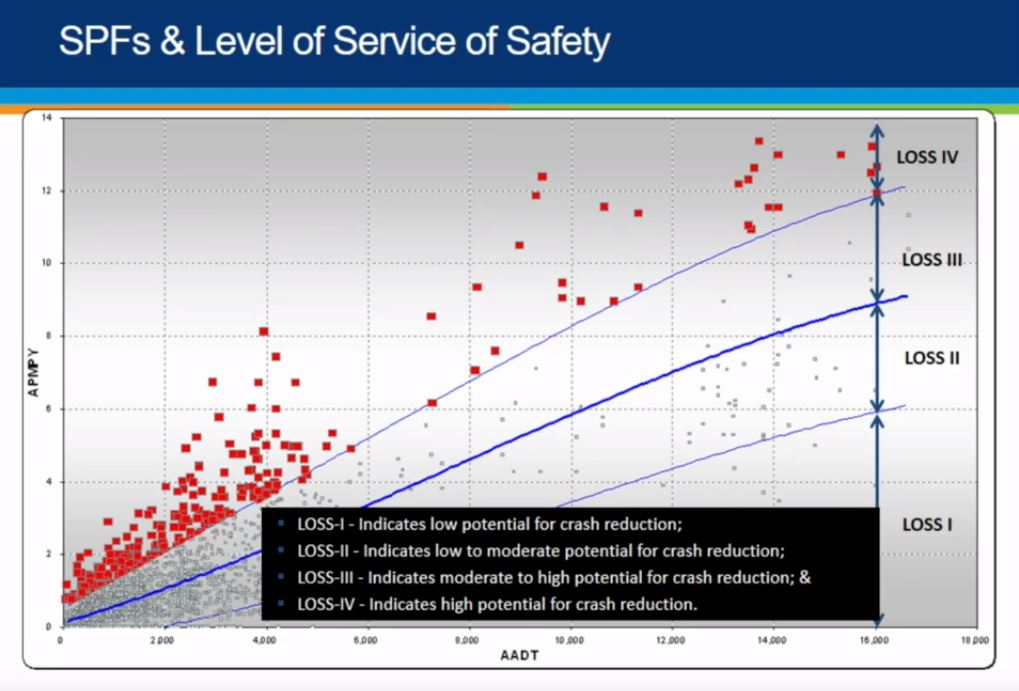

### TODO #4: Take top crash type from TODO #3 list and run data prep (segment roads to 1mile, assign crashes, calculate crash rate)

Data:
- Maryland road segments from Crash Analysis solution
- FARS 2010 to 2014 for Maryland

In [452]:
crashes_df = top_types_dict['Rank_1']['accidents_df']
crashes_fc = top_types_dict['Rank_1']['accidents_fc']
crashes_df.head()

,SHAPE,STATE,COUNTY,PERSONS,PEDS,ROAD_FNC,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,...,A_DIST,A_DROWSY,YEAR_TEXT,MONTH_TEXT,DAY_TEXT,HOUR_TEXT,MINUTE_TEXT,DATE,DATETIME_2,Cause
0,"{""x"": -8472633.74400213, ""y"": 4804875.96584184...",24,25,4,1,1,12,1,1,1,...,1,2,2003,1,2,18,38,2003-01-02,2003-01-02 18:38:00,Motor Vehicle in Transport
7,"{""x"": -8376862.803109456, ""y"": 4640047.3917500...",24,47,2,0,4,12,5,1,1,...,1,2,2003,1,8,5,8,2003-01-08,2003-01-08 05:08:00,Motor Vehicle in Transport
13,"{""x"": -8545030.374877833, ""y"": 4692738.2950657...",24,33,2,0,13,12,5,1,1,...,1,2,2003,1,14,8,4,2003-01-14,2003-01-14 08:04:00,Motor Vehicle in Transport
15,"{""x"": -8430174.016743066, ""y"": 4690907.8042819...",24,11,6,0,5,12,2,1,1,...,2,2,2003,1,15,9,54,2003-01-15,2003-01-15 09:54:00,Motor Vehicle in Transport
16,"{""x"": -8574356.257985406, ""y"": 4739101.9370041...",24,31,3,0,3,12,5,1,1,...,2,2,2003,1,5,11,3,2003-01-05,2003-01-05 11:03:00,Motor Vehicle in Transport


In [453]:
roads_df = pd.DataFrame.spatial.from_layer(analysisroads_allmd_item.layers[0])
roads_df.head()

,AVG_CRASH,CRASH_2010,CRASH_2011,CRASH_2012,CRASH_2013,CRASH_2014,CRASH_DENSITY,CRASH_DENSITY_RISK,CRASH_RATE,CRASH_RATE_RATIO,...,USRAP_AREA_TYPE,USRAP_AVG_AADT,USRAP_CLASSIFICATION_ERROR,USRAP_COUNTY,USRAP_LANES,USRAP_MEDIAN,USRAP_ROADWAY_TYPE,USRAP_SEGID,USRAP_SEGMENT,USRAP_SPEED_LIMIT
0,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,4399.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3740,YES,40
1,0.4,0,1,0,1,0,16.11991,Medium risk,266.7722,7.504218,...,Rural,3311.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3661,YES,25
2,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,5961.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3756,YES,50
3,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Rural,8139.7,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3745,YES,40
4,0.0,0,0,0,0,0,0.00000,Lowest risk,0.0000,0.000000,...,Urban,11191.0,None,Calvert,4,Undivided Roadway,Urban Multilane Undivided,4581,YES,50


In [454]:
roads_df.columns

Index(['AVG_CRASH', 'CRASH_2010', 'CRASH_2011', 'CRASH_2012', 'CRASH_2013',
       'CRASH_2014', 'CRASH_DENSITY', 'CRASH_DENSITY_RISK', 'CRASH_RATE',
       'CRASH_RATE_RATIO', 'CRASH_RATE_RATIO_RISK', 'CRASH_RATE_RISK',
       'OBJECTID', 'POTENTIAL_CRASH_SAVINGS', 'POTENTIAL_CRASH_SAVINGS_RISK',
       'ROUTETYPE', 'ROUTE_NAME', 'SHAPE', 'Shape__Length', 'TOTAL_CRASH',
       'USRAP_AADT_2010', 'USRAP_AADT_2011', 'USRAP_AADT_2012',
       'USRAP_AADT_2013', 'USRAP_AADT_2014', 'USRAP_ACCESS_CONTROL',
       'USRAP_AREA_TYPE', 'USRAP_AVG_AADT', 'USRAP_CLASSIFICATION_ERROR',
       'USRAP_COUNTY', 'USRAP_LANES', 'USRAP_MEDIAN', 'USRAP_ROADWAY_TYPE',
       'USRAP_SEGID', 'USRAP_SEGMENT', 'USRAP_SPEED_LIMIT'],
      dtype='object')

In [455]:
roads_fc = roads_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "roads_polylines"))
roads_fc

'/arcgis/home/anieto/workspace/maryland_analysis.gdb/roads_polylines'

In [456]:
roads_df.ROUTE_NAME.isnull().values.any()

False

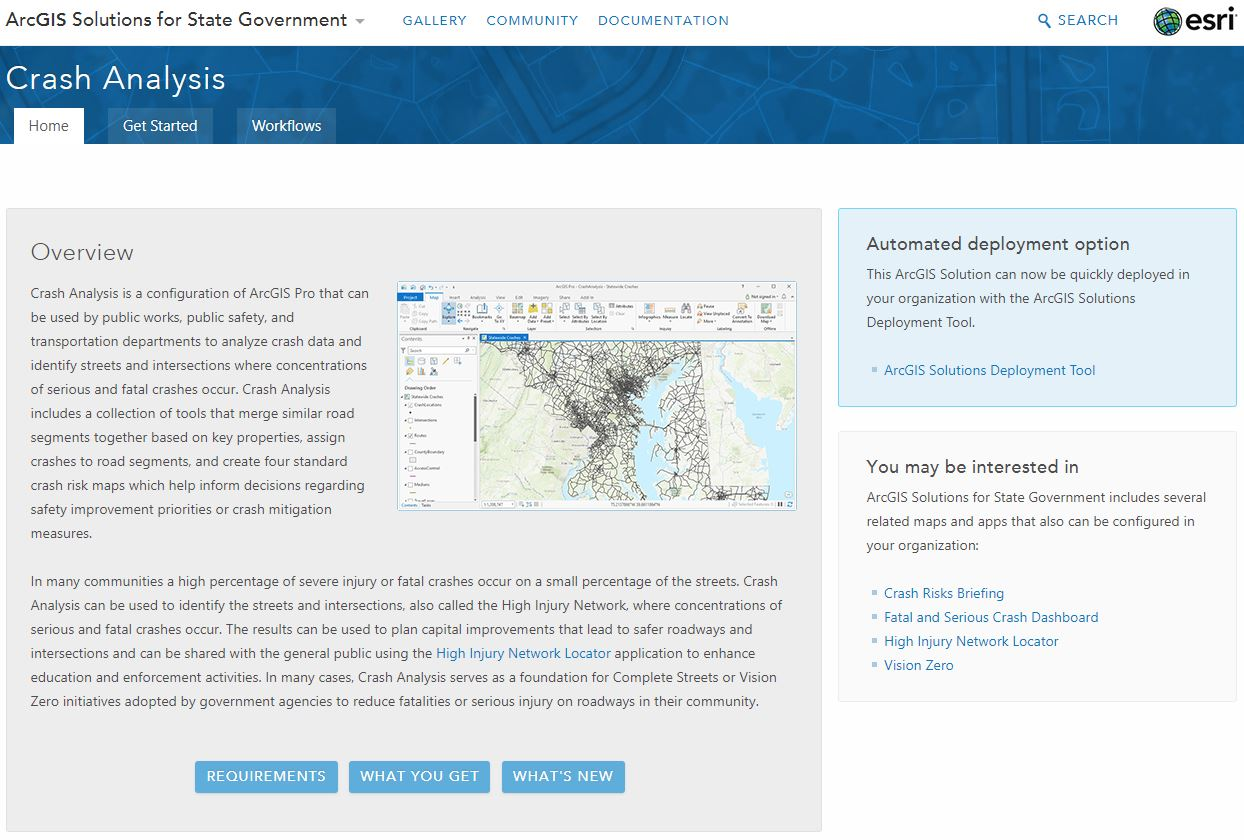

<Item title:"Routes_wFHWACrashRate_forMVTFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
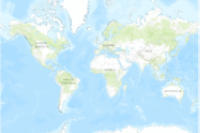

In [457]:
routes_fhwans_mvtcrashes_item

<Item title:"Routes_wFHWACrashRate_forPedestrianFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
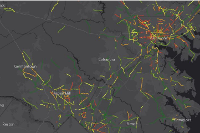

In [458]:
routes_fhwans_pedestriancrashes_item

<Item title:"Routes_wFHWACrashRate_forTreeFatalCrashes" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
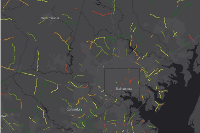

In [459]:
routes_fhwans_treecrashes_item

In [543]:
segmented_routes_map = gis.map("Maryland")
segmented_routes_map.basemap = 'gray'
# segmented_routes_map.add_layer(routes_maryland_baseline_item)
# segmented_routes_map.add_layer(routes_maryland_baseline_vt_item)
segmented_routes_map.add_layer(routes_fhwans_mvtcrashes_item)
segmented_routes_map

MapView(layout=Layout(height='400px', width='100%'))

In [544]:
segmented_routes_map = gis.map("Maryland")
segmented_routes_map.basemap = 'gray'
# segmented_routes_map.add_layer(routes_maryland_baseline_item)
# segmented_routes_map.add_layer(routes_maryland_baseline_vt_item)
segmented_routes_map.add_layer(routes_fhwans_pedestriancrashes_item)
segmented_routes_map

MapView(layout=Layout(height='400px', width='100%'))

In [545]:
segmented_routes_map = gis.map("Maryland")
segmented_routes_map.basemap = 'gray'
# segmented_routes_map.add_layer(routes_maryland_baseline_item)
# segmented_routes_map.add_layer(routes_maryland_baseline_vt_item)
segmented_routes_map.add_layer(routes_fhwans_treecrashes_item)
segmented_routes_map

MapView(layout=Layout(height='400px', width='100%'))

### TODO #5: Use multivariate clustering to group all road segments into similar road types. 

Data: Output road segments with crash rates from TODO #4

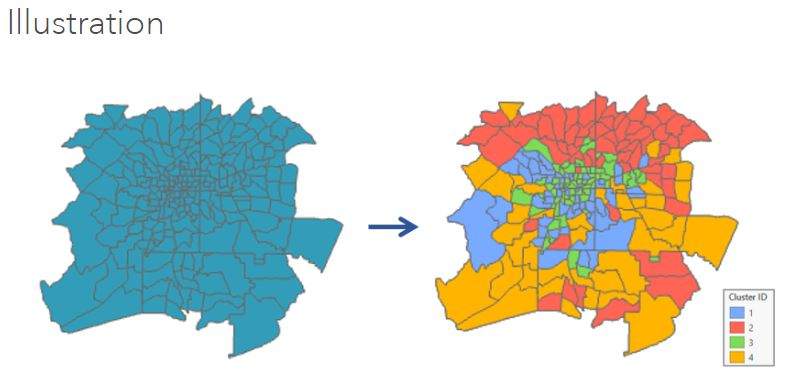

In [463]:
# Helper functions for categorical dummy variables for access_control, divided_roadway, rural_road

def return_any_access_control_dummyvar(access_ctrl_val):
    if access_ctrl_val == "No Access Control":
        return 0
    else:
        return 1

def return_full_access_control_dummyvar(access_ctrl_val):
    if access_ctrl_val == "Full Access Control":
        return 1
    else:
        return 0
    
def return_partial_access_control_dummyvar(access_ctrl_val):
    if access_ctrl_val == "Partial Access Control":
        return 1
    else:
        return 0
    
def return_divided_rdwy_dummyvar(divided_val):
    if divided_val == "Divided Roadway":
        return 1
    else:
        return 0

def return_rural_rdwy_dummyvar(rural_val):
    if rural_val == "Rural":
        return 1
    else:
        return 0
    
def return_urban_rdwy_dummyvar(urban_val):
    if urban_val == "Urban":
        return 1
    else:
        return 0

In [464]:
# Function to retrieve multivariate clustering outputs for an input road features layer
def get_multvarclusters_df_from_roads_item(segmented_roads_item):
    
    # Convert item into df
    segroutes_layer = segmented_roads_item.layers[0]
    segroutes_df = pd.DataFrame.spatial.from_layer(segroutes_layer)
    
    # Create categorical dummy variables for access_control, divided_roadway, rural_road
    segroutes_df['has_access_control'] = segroutes_df.apply(lambda x: return_any_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
    segroutes_df['has_full_access_control'] = segroutes_df.apply(lambda x: return_full_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
    segroutes_df['has_partial_access_control'] = segroutes_df.apply(lambda x: return_partial_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
    segroutes_df['is_divided'] = segroutes_df.apply(lambda x: return_divided_rdwy_dummyvar(x['SegmentOutput_USRAP_MEDIAN']), axis=1)
    segroutes_df['is_rural'] = segroutes_df.apply(lambda x: return_rural_rdwy_dummyvar(x['SegmentOutput_USRAP_AREA_TYPE']), axis=1)
    segroutes_df['is_urban'] = segroutes_df.apply(lambda x: return_urban_rdwy_dummyvar(x['SegmentOutput_USRAP_AREA_TYPE']), axis=1)

    # Convert to feature class in order to run multivariate clustering
    segroutes_fc = segroutes_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_segroutes"))

    # Run multivariate clustering
    multvar_clustering_fields = ["is_divided", "is_urban", "has_access_control", "SegmentOutput_USRAP_AVG_AADT", "SegmentOutput_USRAP_LANES", "SegmentOutput_USRAP_SPEED_LIMIT"]
    multvar_cluster_result = arcpy.stats.MultivariateClustering(segroutes_fc, os.path.join(workspace_fgdb, "routes_multvar"), multvar_clustering_fields, "K_MEANS", "OPTIMIZED_SEED_LOCATIONS", None, "4")
    print("Running multivariate clustering...")
    print(multvar_cluster_result.getMessages(0))
    
    # Convert multivariate clustering output to dataframe
    mvc_df = pd.DataFrame.spatial.from_featureclass(multvar_cluster_result.getOutput(0))
    
    # Drop shape field from multivariate clustering output in order to preserve field name during join operation
    mvc_df.drop('SHAPE', axis=1, inplace=True)
    
    # Merge multivariate clustering outputs back to segmented routes dataframe
    multvarcluster_roads_df = pd.merge(segroutes_df, mvc_df, on="OBJECTID")
    
    return multvarcluster_roads_df 

In [465]:
print("Processing multivariate clustering for MVT crashes...")
mvt_df = get_multvarclusters_df_from_roads_item(routes_fhwans_mvtcrashes_item)
print("Processing multivariate clustering for Pedestrian crashes...")
ped_df = get_multvarclusters_df_from_roads_item(routes_fhwans_pedestriancrashes_item)
print("Processing multivariate clustering for Tree crashes...")
tree_df = get_multvarclusters_df_from_roads_item(routes_fhwans_treecrashes_item)

Processing multivariate clustering for MVT crashes...
Running multivariate clustering...
Start Time: Wednesday, January 30, 2019 1:30:25 PM
Running script MultivariateClustering...

                                Variable-Wise Summary                                
                       Variable         Mean    Std. Dev.       Min           Max       R2
                     IS_DIVIDED     0.163697     0.370000  0.000000      1.000000 1.000000
                       IS_URBAN     0.667038     0.471273  0.000000      1.000000 0.928018
             HAS_ACCESS_CONTROL     0.081849     0.274134  0.000000      1.000000 0.897719
   SEGMENTOUTPUT_USRAP_AVG_AADT 19790.870434 29601.852127  0.000000 202136.900000 0.522572
      SEGMENTOUTPUT_USRAP_LANES     3.080735     1.709285  1.000000     24.000000 0.270959
SEGMENTOUTPUT_USRAP_SPEED_LIMIT    39.813474    10.484173 15.000000     70.000000 0.259092

Completed script Multivariate Clustering...
Succeeded at Wednesday, January 30, 2019 1:30:27 P

In [466]:
print(mvt_df.shape[0], ped_df.shape[0], tree_df.shape[0])

1796 949 556


##### <<<< Start single sequence test >>>>

In [467]:
segroutes_mvt_layer = routes_fhwans_mvtcrashes_item.layers[0]
segroutes_mvt_df = pd.DataFrame.spatial.from_layer(segroutes_mvt_layer)
segroutes_mvt_df.head()

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_ROUTE_,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SHAPE,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,...,SegmentOutput_USRAP_AVG_AADT,SegmentOutput_USRAP_CLASSIFICAT,SegmentOutput_USRAP_COUNTY,SegmentOutput_USRAP_LANES,SegmentOutput_USRAP_MEDIAN,SegmentOutput_USRAP_ROADWAY_TYP,SegmentOutput_USRAP_SEGID,SegmentOutput_USRAP_SEGMENT,SegmentOutput_USRAP_SPEED_LIMIT,Shape__Length
0,1,8720.0,2,CENTRAL AVE ...,0.026867,0.008441,"{""paths"": [[[1405410.5917, 451998.064199999], ...",1.2,3,2,...,2684.0,None,Caroline,2,Undivided Roadway,Rural two-lane Undivided,3706,YES,30,14036.632378
1,2,421.0,3,NATIONAL PIKE ...,0.007516,0.048913,"{""paths"": [[[901500.393800002, 734032.06940000...",10.4,10,12,...,4751.7,None,Washington,2,Undivided Roadway,Rural two-lane Undivided,2957,YES,50,50180.354353
2,3,1571.0,2,SOLLEY RD ...,0.060520,0.105542,"{""paths"": [[[1436241.6508, 533699.036600001], ...",6.0,5,7,...,6511.0,None,Anne Arundel,2,Undivided Roadway,Urban two-lane Undivided,4109,YES,30,12463.020777
3,4,6687.0,2,MCMULLEN HWY ...,0.026454,0.010839,"{""paths"": [[[781203.713100001, 685808.05070000...",5.0,7,2,...,6687.0,None,Allegany,3,Undivided Roadway,Rural Multilane Undivided,5393,YES,55,14256.729941
4,5,6419.2,16,NO NAME ...,0.221868,0.094694,"{""paths"": [[[1412949.0441, 541319.3891], [1412...",17.2,11,14,...,35025.2,None,Baltimore City,6,Divided Roadway,Urban Multilane divided,2666,YES,30,5099.371541


In [468]:
segroutes_mvt_df.columns

Index(['OBJECTID', 'Routes_FHWACrashRate_MVT_ADT',
       'Routes_FHWACrashRate_MVT_ROUTET', 'Routes_FHWACrashRate_MVT_ROUTE_',
       'Routes_FHWACrashRate_MVT_c_freq', 'Routes_FHWACrashRate_MVT_c_rate',
       'SHAPE', 'SegmentOutput_AVG_CRASH', 'SegmentOutput_CRASH_2010',
       'SegmentOutput_CRASH_2011', 'SegmentOutput_CRASH_2012',
       'SegmentOutput_CRASH_2013', 'SegmentOutput_CRASH_2014',
       'SegmentOutput_CRASH_DENSITY', 'SegmentOutput_CRASH_DENSITY_RIS',
       'SegmentOutput_CRASH_RATE', 'SegmentOutput_CRASH_RATE_RATIO',
       'SegmentOutput_CRASH_RATE_RATIO_', 'SegmentOutput_CRASH_RATE_RISK',
       'SegmentOutput_OBJECTID', 'SegmentOutput_POTENTIAL_CRASH_1',
       'SegmentOutput_POTENTIAL_CRASH_S', 'SegmentOutput_ROUTETYPE',
       'SegmentOutput_ROUTE_NAME', 'SegmentOutput_TOTAL_CRASH',
       'SegmentOutput_USRAP_AADT_2010', 'SegmentOutput_USRAP_AADT_2011',
       'SegmentOutput_USRAP_AADT_2012', 'SegmentOutput_USRAP_AADT_2013',
       'SegmentOutput_USRAP_AADT_2

In [469]:
# Create categorical dummy variables for access_control, divided_roadway, rural_road
segroutes_mvt_df['has_access_control'] = segroutes_mvt_df.apply(lambda x: return_any_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
segroutes_mvt_df['has_full_access_control'] = segroutes_mvt_df.apply(lambda x: return_full_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
segroutes_mvt_df['has_partial_access_control'] = segroutes_mvt_df.apply(lambda x: return_partial_access_control_dummyvar(x['SegmentOutput_USRAP_ACCESS_CONT']), axis=1)
segroutes_mvt_df['is_divided'] = segroutes_mvt_df.apply(lambda x: return_divided_rdwy_dummyvar(x['SegmentOutput_USRAP_MEDIAN']), axis=1)
segroutes_mvt_df['is_rural'] = segroutes_mvt_df.apply(lambda x: return_rural_rdwy_dummyvar(x['SegmentOutput_USRAP_AREA_TYPE']), axis=1)
segroutes_mvt_df['is_urban'] = segroutes_mvt_df.apply(lambda x: return_urban_rdwy_dummyvar(x['SegmentOutput_USRAP_AREA_TYPE']), axis=1)

segroutes_mvt_df.head()

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_ROUTE_,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SHAPE,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,...,SegmentOutput_USRAP_SEGID,SegmentOutput_USRAP_SEGMENT,SegmentOutput_USRAP_SPEED_LIMIT,Shape__Length,has_access_control,has_full_access_control,has_partial_access_control,is_divided,is_rural,is_urban
0,1,8720.0,2,CENTRAL AVE ...,0.026867,0.008441,"{""paths"": [[[1405410.5917, 451998.064199999], ...",1.2,3,2,...,3706,YES,30,14036.632378,0,0,0,0,1,0
1,2,421.0,3,NATIONAL PIKE ...,0.007516,0.048913,"{""paths"": [[[901500.393800002, 734032.06940000...",10.4,10,12,...,2957,YES,50,50180.354353,0,0,0,0,1,0
2,3,1571.0,2,SOLLEY RD ...,0.060520,0.105542,"{""paths"": [[[1436241.6508, 533699.036600001], ...",6.0,5,7,...,4109,YES,30,12463.020777,0,0,0,0,0,1
3,4,6687.0,2,MCMULLEN HWY ...,0.026454,0.010839,"{""paths"": [[[781203.713100001, 685808.05070000...",5.0,7,2,...,5393,YES,55,14256.729941,0,0,0,0,1,0
4,5,6419.2,16,NO NAME ...,0.221868,0.094694,"{""paths"": [[[1412949.0441, 541319.3891], [1412...",17.2,11,14,...,2666,YES,30,5099.371541,0,0,0,1,0,1


In [470]:
segroutes_mvt_fc = segroutes_mvt_df.spatial.to_featureclass(os.path.join(workspace_fgdb, "temp_segroutes"))
segroutes_mvt_fc

'/arcgis/home/anieto/workspace/maryland_analysis.gdb/temp_segroutes'

In [471]:
# Run multivariate clustering
multvar_clustering_fields = ["is_divided", "is_urban", "has_access_control", "SegmentOutput_USRAP_AVG_AADT", "SegmentOutput_USRAP_LANES", "SegmentOutput_USRAP_SPEED_LIMIT"]
multvar_cluster_result = arcpy.stats.MultivariateClustering(segroutes_mvt_fc, os.path.join(workspace_fgdb, "routes_multvar"), multvar_clustering_fields, "K_MEANS", "OPTIMIZED_SEED_LOCATIONS", None, "4")
multvar_cluster_result.getMessages(0)

'Start Time: Wednesday, January 30, 2019 1:31:07 PM\nRunning script MultivariateClustering...\n\n                                Variable-Wise Summary                                \n                       Variable         Mean    Std. Dev.       Min           Max       R2\n                     IS_DIVIDED     0.163697     0.370000  0.000000      1.000000 1.000000\n                       IS_URBAN     0.667038     0.471273  0.000000      1.000000 0.928018\n             HAS_ACCESS_CONTROL     0.081849     0.274134  0.000000      1.000000 0.897719\n   SEGMENTOUTPUT_USRAP_AVG_AADT 19790.870434 29601.852127  0.000000 202136.900000 0.522572\n      SEGMENTOUTPUT_USRAP_LANES     3.080735     1.709285  1.000000     24.000000 0.270959\nSEGMENTOUTPUT_USRAP_SPEED_LIMIT    39.813474    10.484173 15.000000     70.000000 0.259092\n\nCompleted script Multivariate Clustering...\nSucceeded at Wednesday, January 30, 2019 1:31:09 PM (Elapsed Time: 1.84 seconds)'

In [472]:
mvc_df = pd.DataFrame.spatial.from_featureclass(multvar_cluster_result.getOutput(0))
mvc_df.head()

,OBJECTID,SOURCE_ID,is_divided,is_urban,has_access_control,SegmentOutput_USRAP_AVG_AADT,SegmentOutput_USRAP_LANES,SegmentOutput_USRAP_SPEED_LIMIT,CLUSTER_ID,IS_SEED,SHAPE
0,1,1,0,0,0,2684.0,2,30,1,0,"{""paths"": [[[1405410.5917533934, 451998.064103..."
1,2,2,0,0,0,4751.7,2,50,1,0,"{""paths"": [[[901500.393867135, 734032.06926031..."
2,3,3,0,1,0,6511.0,2,30,2,0,"{""paths"": [[[1436241.6508260518, 533699.036528..."
3,4,4,0,0,0,6687.0,3,55,1,0,"{""paths"": [[[781203.7132011354, 685808.0505510..."
4,5,5,1,1,0,35025.2,6,30,3,0,"{""paths"": [[[1412949.0441961437, 541319.389069..."


In [474]:
# Join the cluster IDs back to the original dataframe
segroutes_mvt_df.head()

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_ROUTE_,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SHAPE,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,...,SegmentOutput_USRAP_SEGID,SegmentOutput_USRAP_SEGMENT,SegmentOutput_USRAP_SPEED_LIMIT,Shape__Length,has_access_control,has_full_access_control,has_partial_access_control,is_divided,is_rural,is_urban
0,1,8720.0,2,CENTRAL AVE ...,0.026867,0.008441,"{""paths"": [[[1405410.5917, 451998.064199999], ...",1.2,3,2,...,3706,YES,30,14036.632378,0,0,0,0,1,0
1,2,421.0,3,NATIONAL PIKE ...,0.007516,0.048913,"{""paths"": [[[901500.393800002, 734032.06940000...",10.4,10,12,...,2957,YES,50,50180.354353,0,0,0,0,1,0
2,3,1571.0,2,SOLLEY RD ...,0.060520,0.105542,"{""paths"": [[[1436241.6508, 533699.036600001], ...",6.0,5,7,...,4109,YES,30,12463.020777,0,0,0,0,0,1
3,4,6687.0,2,MCMULLEN HWY ...,0.026454,0.010839,"{""paths"": [[[781203.713100001, 685808.05070000...",5.0,7,2,...,5393,YES,55,14256.729941,0,0,0,0,1,0
4,5,6419.2,16,NO NAME ...,0.221868,0.094694,"{""paths"": [[[1412949.0441, 541319.3891], [1412...",17.2,11,14,...,2666,YES,30,5099.371541,0,0,0,1,0,1


In [475]:
mvc_df.head()

,OBJECTID,SOURCE_ID,is_divided,is_urban,has_access_control,SegmentOutput_USRAP_AVG_AADT,SegmentOutput_USRAP_LANES,SegmentOutput_USRAP_SPEED_LIMIT,CLUSTER_ID,IS_SEED,SHAPE
0,1,1,0,0,0,2684.0,2,30,1,0,"{""paths"": [[[1405410.5917533934, 451998.064103..."
1,2,2,0,0,0,4751.7,2,50,1,0,"{""paths"": [[[901500.393867135, 734032.06926031..."
2,3,3,0,1,0,6511.0,2,30,2,0,"{""paths"": [[[1436241.6508260518, 533699.036528..."
3,4,4,0,0,0,6687.0,3,55,1,0,"{""paths"": [[[781203.7132011354, 685808.0505510..."
4,5,5,1,1,0,35025.2,6,30,3,0,"{""paths"": [[[1412949.0441961437, 541319.389069..."


In [476]:
mvc_df.drop('SHAPE', axis=1, inplace=True)

In [477]:
merged_routes_df = pd.merge(segroutes_mvt_df, mvc_df, on="OBJECTID")
merged_routes_df.head()

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_ROUTE_,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SHAPE,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,...,is_urban_x,SOURCE_ID,is_divided_y,is_urban_y,has_access_control_y,SegmentOutput_USRAP_AVG_AADT_y,SegmentOutput_USRAP_LANES_y,SegmentOutput_USRAP_SPEED_LIMIT_y,CLUSTER_ID,IS_SEED
0,1,8720.0,2,CENTRAL AVE ...,0.026867,0.008441,"{'paths': [[[1405410.5917, 451998.064199999], ...",1.2,3,2,...,0,1,0,0,0,2684.0,2,30,1,0
1,2,421.0,3,NATIONAL PIKE ...,0.007516,0.048913,"{'paths': [[[901500.393800002, 734032.06940000...",10.4,10,12,...,0,2,0,0,0,4751.7,2,50,1,0
2,3,1571.0,2,SOLLEY RD ...,0.060520,0.105542,"{'paths': [[[1436241.6508, 533699.036600001], ...",6.0,5,7,...,1,3,0,1,0,6511.0,2,30,2,0
3,4,6687.0,2,MCMULLEN HWY ...,0.026454,0.010839,"{'paths': [[[781203.713100001, 685808.05070000...",5.0,7,2,...,0,4,0,0,0,6687.0,3,55,1,0
4,5,6419.2,16,NO NAME ...,0.221868,0.094694,"{'paths': [[[1412949.0441, 541319.3891], [1412...",17.2,11,14,...,1,5,1,1,0,35025.2,6,30,3,0


##### <<<< End single sequence test >>>>

In [ ]:
# Create multivariate clustering map
mvc_mvt_map = gis.map("Maryland")
mvc_mvt_map.basemap = 'gray'
mvt_df.spatial.plot(map_widget=mvc_mvt_map, renderer_type='u', col='CLUSTER_ID')
mvc_mvt_map

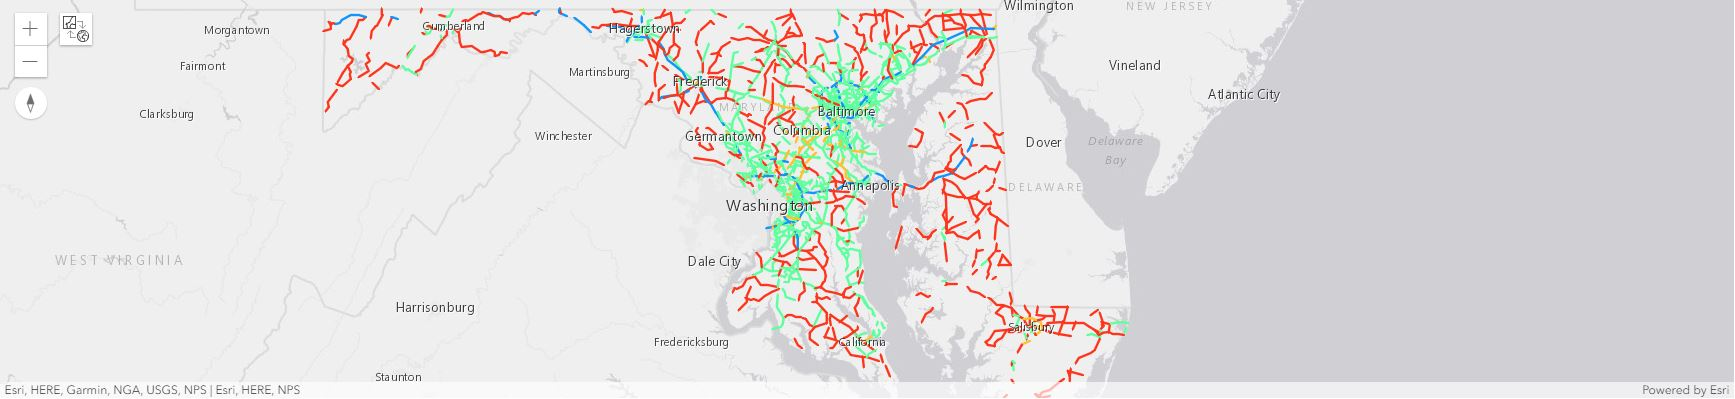

In [479]:
# Create box plots

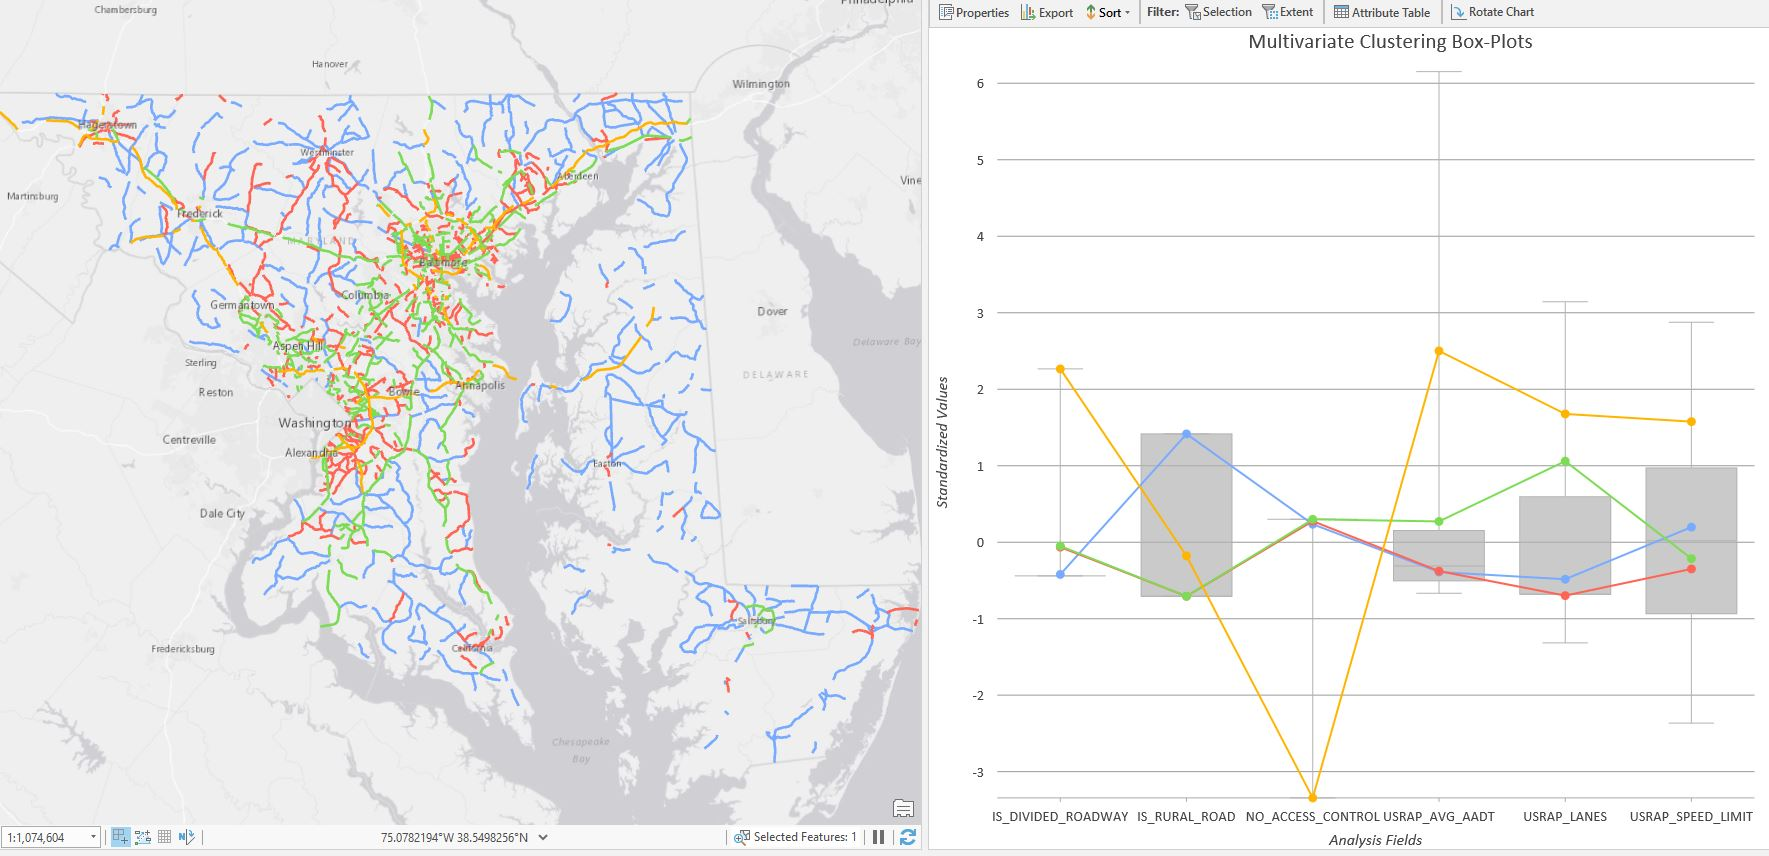

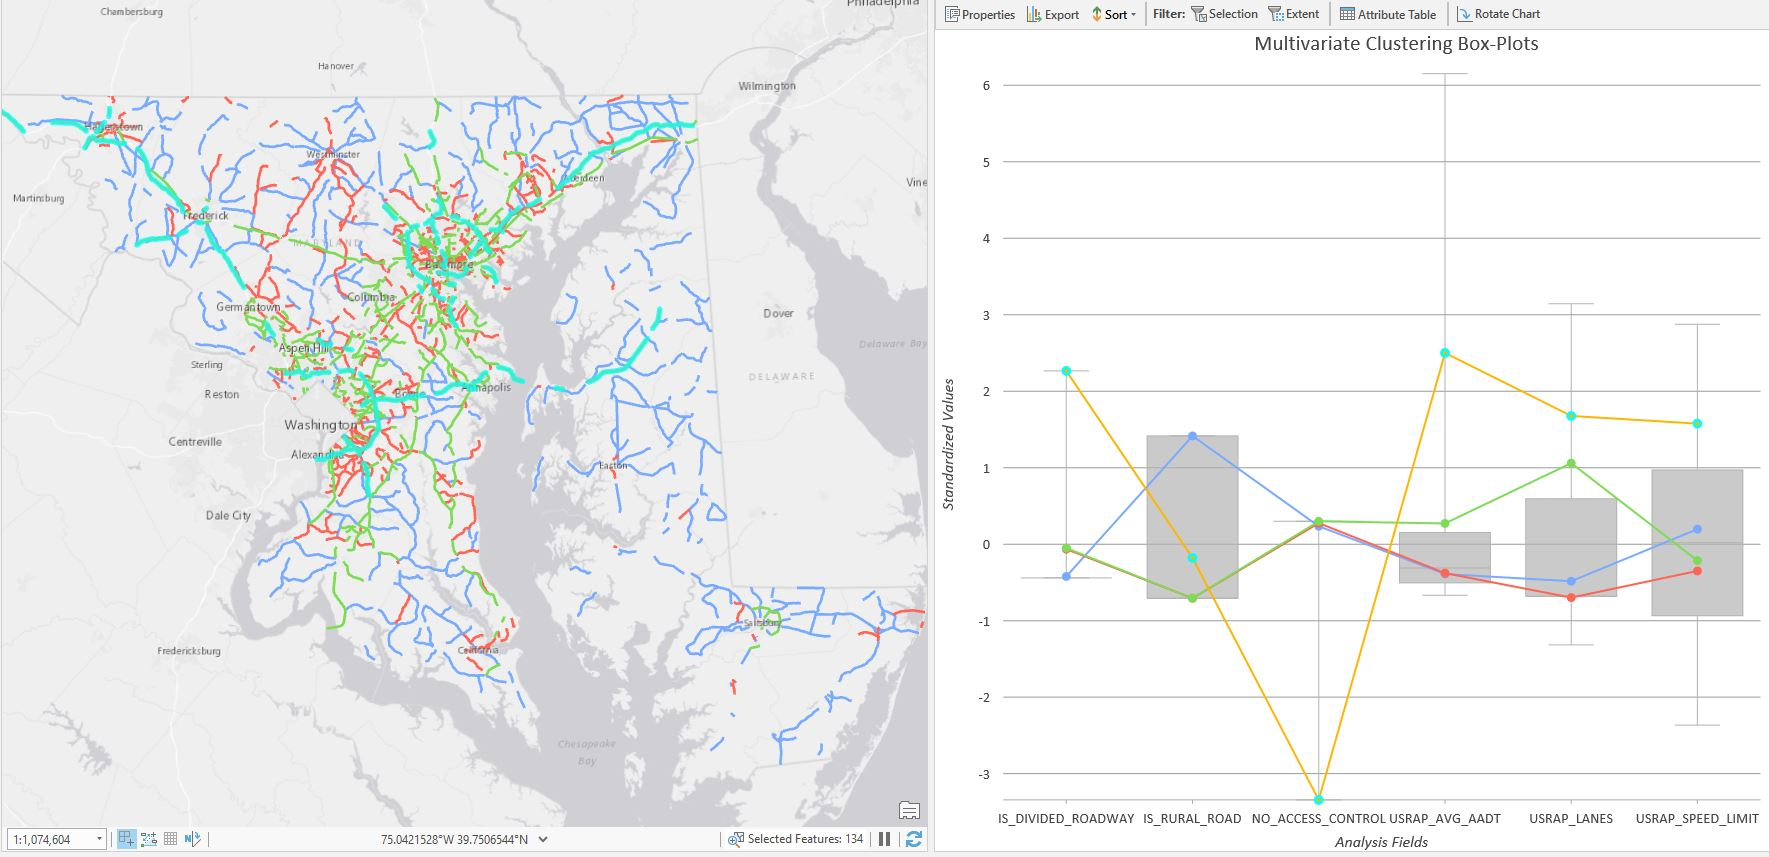

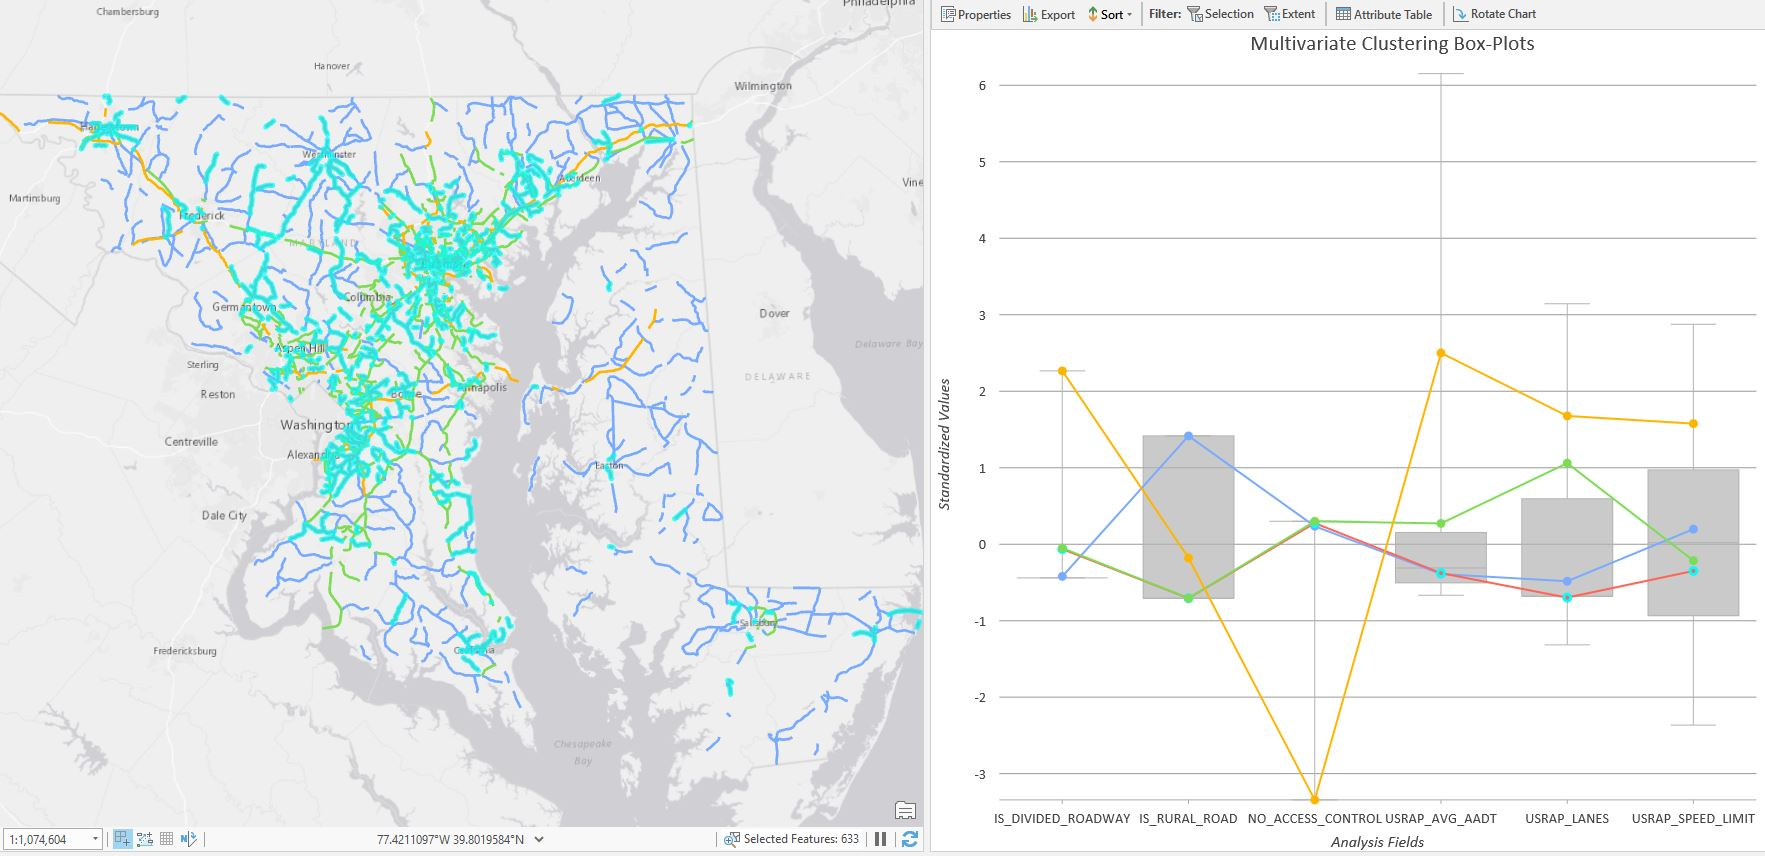

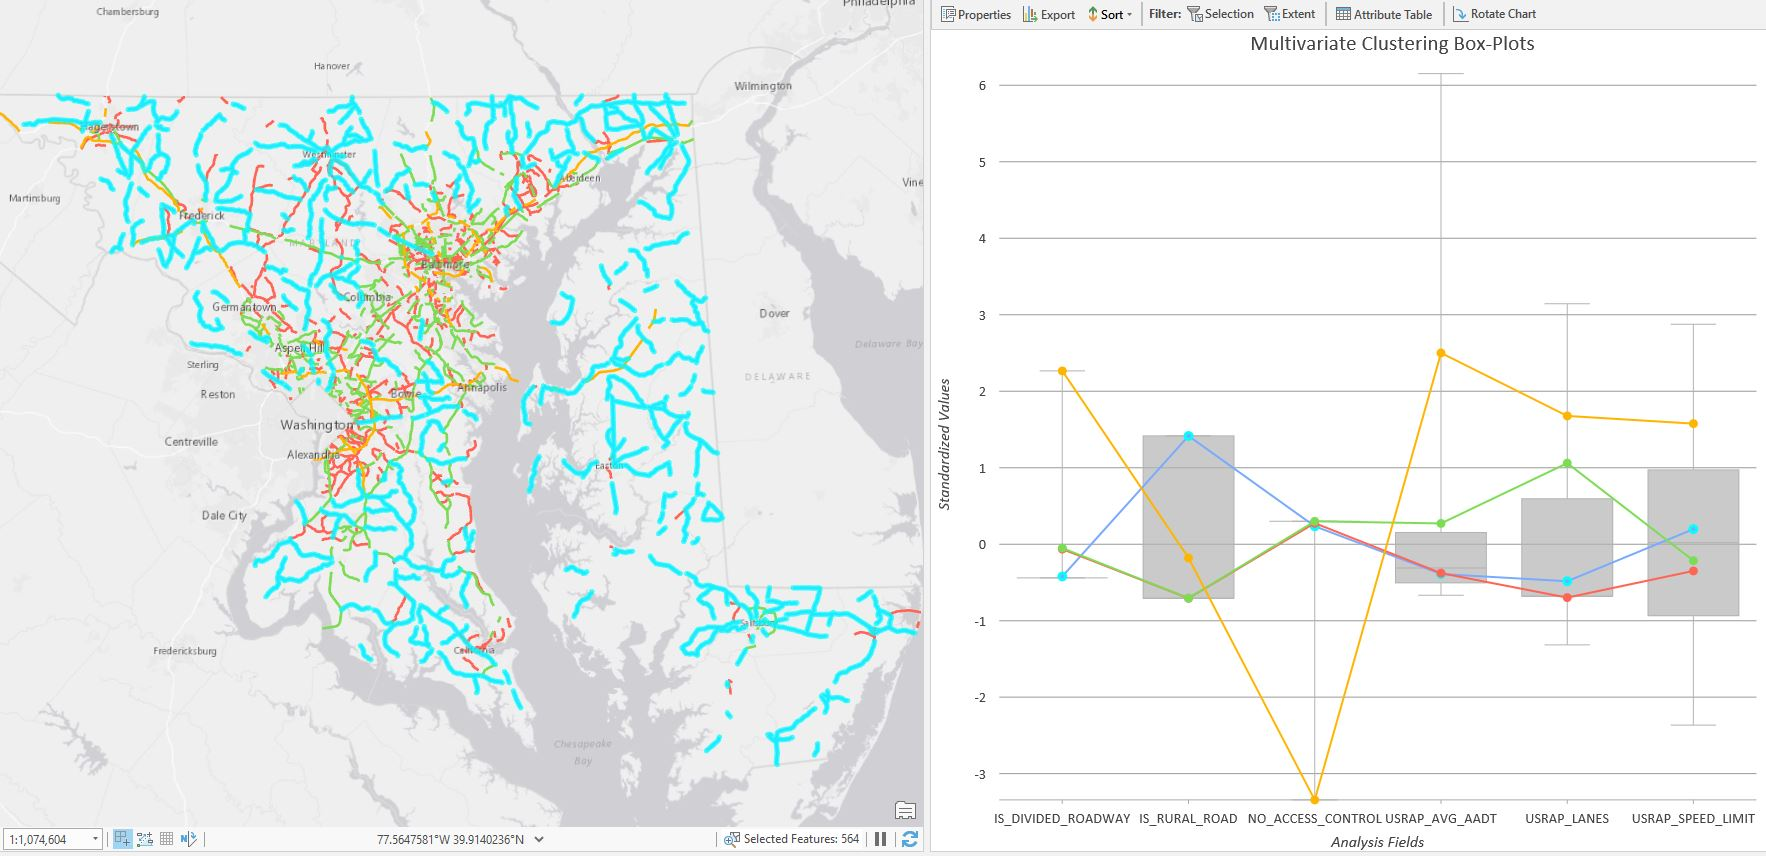

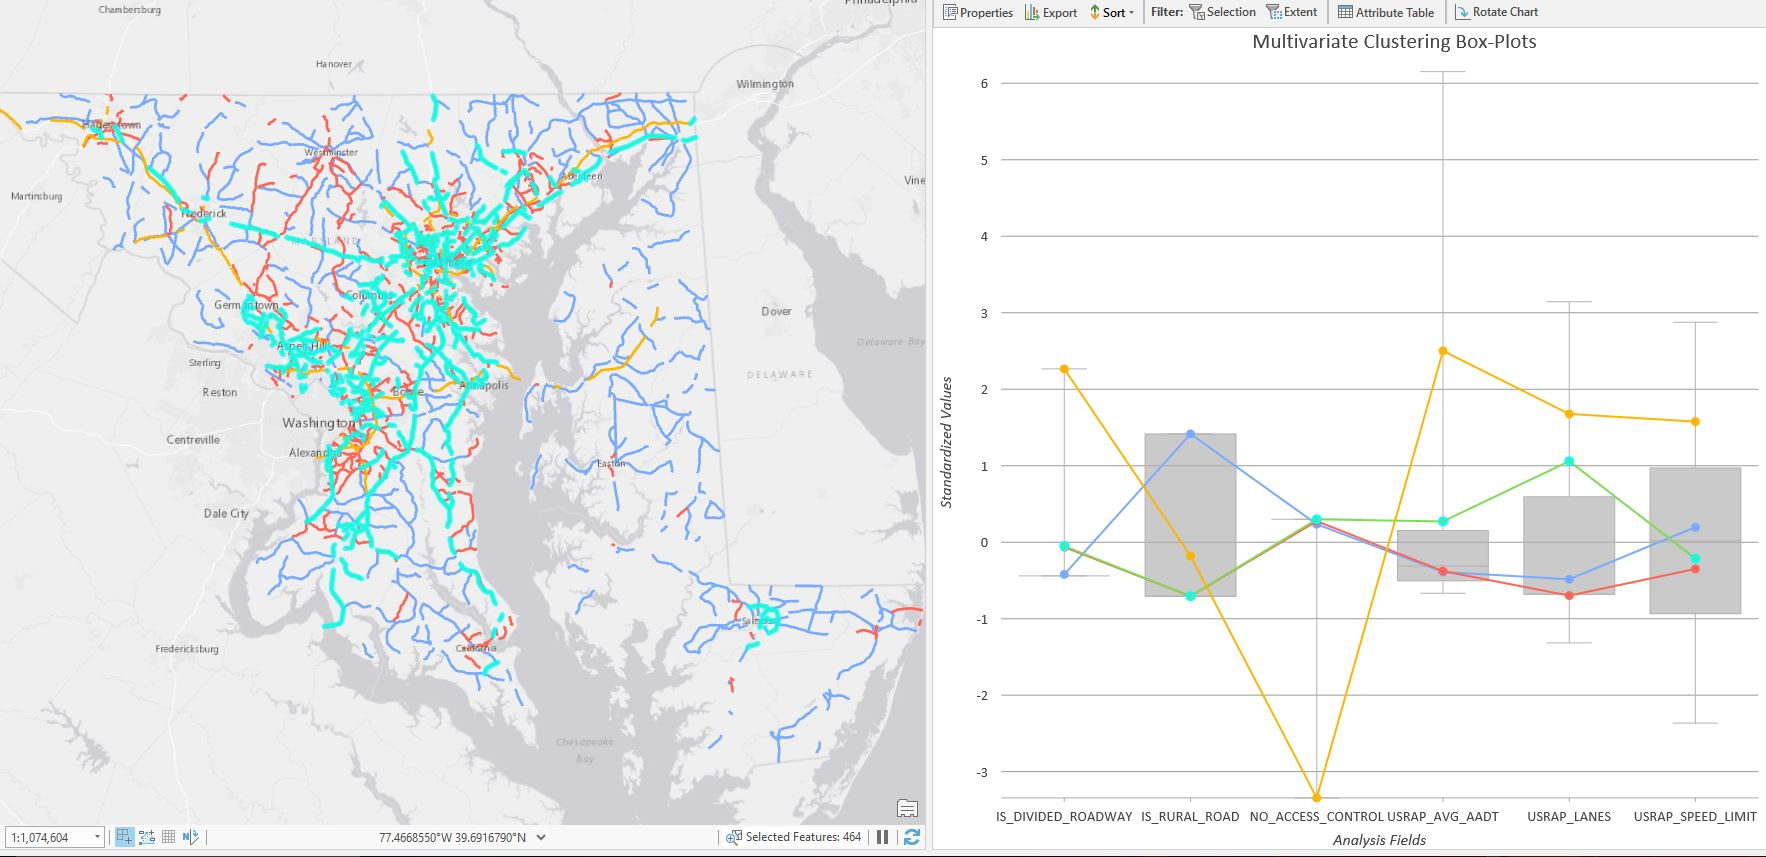

In [ ]:
# Create multivariate clustering map
mvc_mvt_map = gis.map("Maryland")
mvc_mvt_map.basemap = 'gray'
mvt_df.spatial.plot(map_widget=mvc_mvt_map, renderer_type='u', col='CLUSTER_ID')
mvc_mvt_map

In [ ]:
# Create multivariate clustering map
mvc_ped_map = gis.map("Maryland")
mvc_ped_map.basemap = 'gray'
ped_df.spatial.plot(map_widget=mvc_ped_map, renderer_type='u', col='CLUSTER_ID')
mvc_ped_map

In [ ]:
# Create multivariate clustering map
mvc_tree_map = gis.map("Maryland")
mvc_tree_map.basemap = 'gray'
tree_df.spatial.plot(map_widget=mvc_tree_map, renderer_type='u', col='CLUSTER_ID')
mvc_tree_map

### TODO #6: For each crash type, for each multivariate clustering group, create the crash count chart (crash count by AADT)

Data: Outputs from TODO #5 with crash count, AADT, and crash rate from TODO #4

### TODO #7: Add SPF regression line and confidence intervals (LOSS 1, 2, 3, 4 from MDT)

Data: Output from TODO#8; SPF Clearinghouse

In [483]:
# Helper function to plot Crash-related by Traffic Volume-related relationships
def get_crash_relationship_plots_by_cluster(df, aadt_field='SegmentOutput_USRAP_AVG_AADT_x', crash_field='SegmentOutput_CRASH_DENSITY', regline_case_field='CLUSTER_ID',
                                            simple_plot=True, single_plot_wreglines=True, multi_plot_wreglines=True,
                                            ci=95):
    simple_plot = sns.lmplot(x=aadt_field, y=crash_field, data=df, fit_reg=True) 
    single_plot_wreglines = sns.lmplot(x=aadt_field, y=crash_field, data=df,fit_reg=True, ci=ci, hue=regline_case_field) 
    multi_plot_wreglines = sns.lmplot(x=aadt_field, y=crash_field, data=df,fit_reg=True, ci=ci, col=regline_case_field) 
    
    return simple_plot, single_plot_wreglines, multi_plot_wreglines

Crash-related and volume-related relationship for 'Motor-vehicle in Transport' category...


(<seaborn.axisgrid.FacetGrid at 0x7fb462c21128>,
 <seaborn.axisgrid.FacetGrid at 0x7fb4756fe978>)

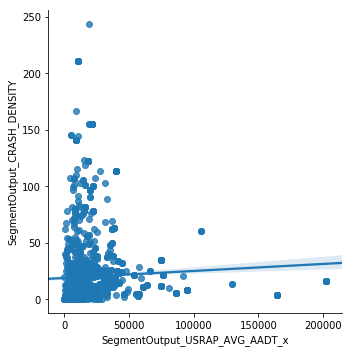

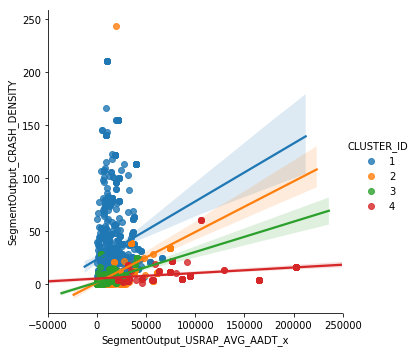

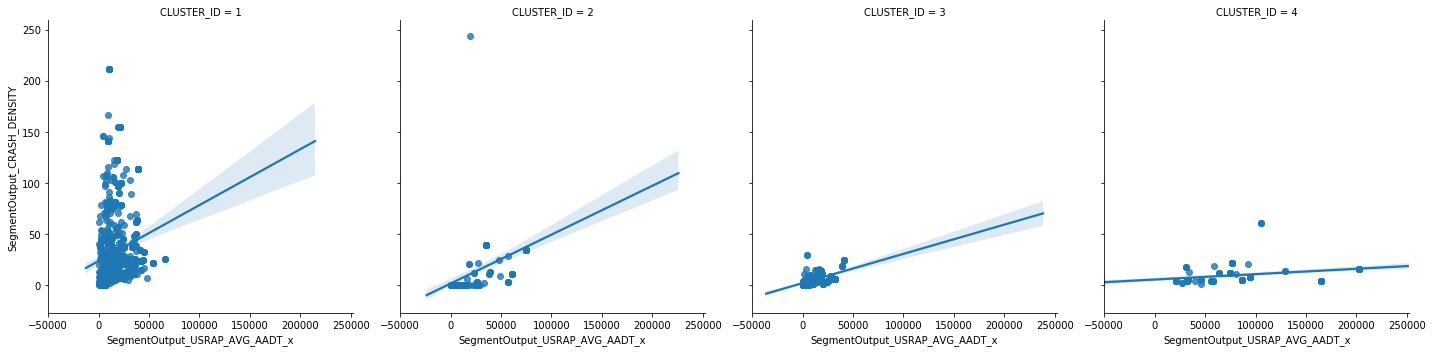

In [484]:
print("Crash-related and volume-related relationship for 'Motor-vehicle in Transport' category...")
get_crash_relationship_plots_by_cluster(mvt_df, regline_case_field='CLUSTER_ID')

Crash-related and volume-related relationship for 'Pedestrian' category...


(<seaborn.axisgrid.FacetGrid at 0x7fb462aaaac8>,
 <seaborn.axisgrid.FacetGrid at 0x7fb462a1a080>)

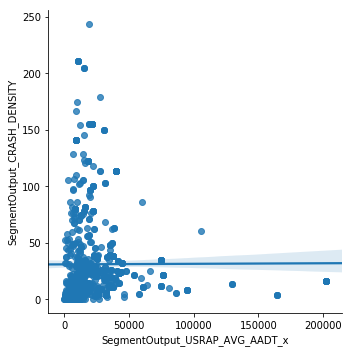

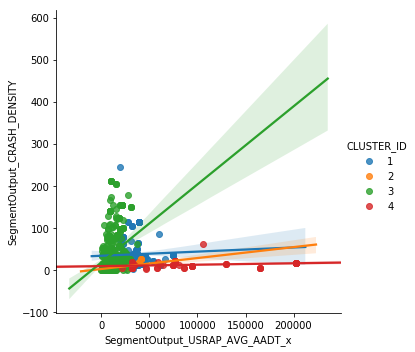

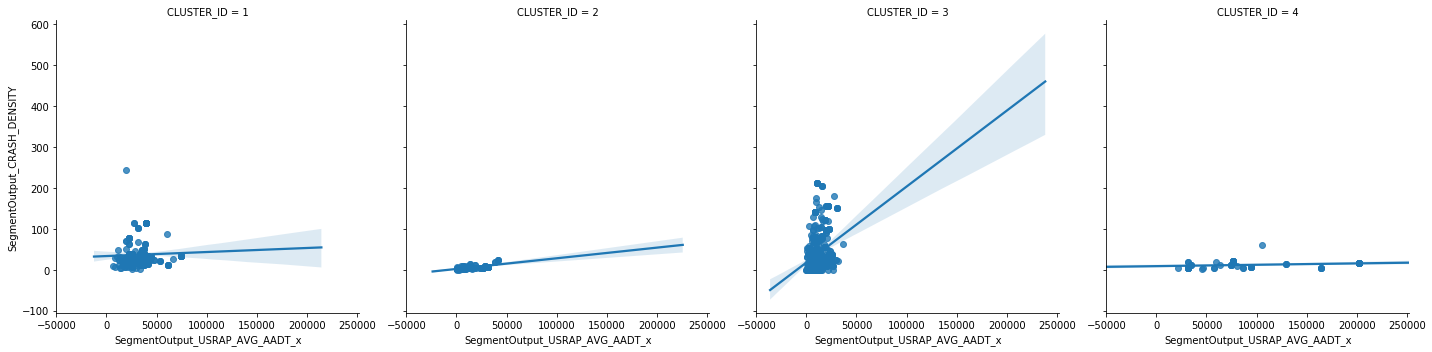

In [485]:
print("Crash-related and volume-related relationship for 'Pedestrian' category...")
get_crash_relationship_plots_by_cluster(ped_df, regline_case_field='CLUSTER_ID')

Crash-related and volume-related relationship for 'Pedestrian' category...


(<seaborn.axisgrid.FacetGrid at 0x7fb462892518>,
 <seaborn.axisgrid.FacetGrid at 0x7fb462a33f28>)

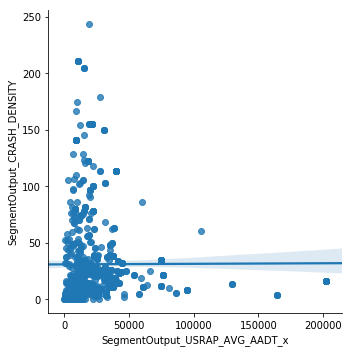

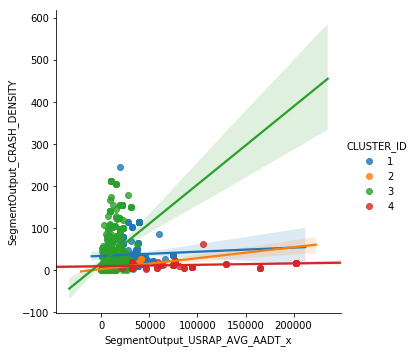

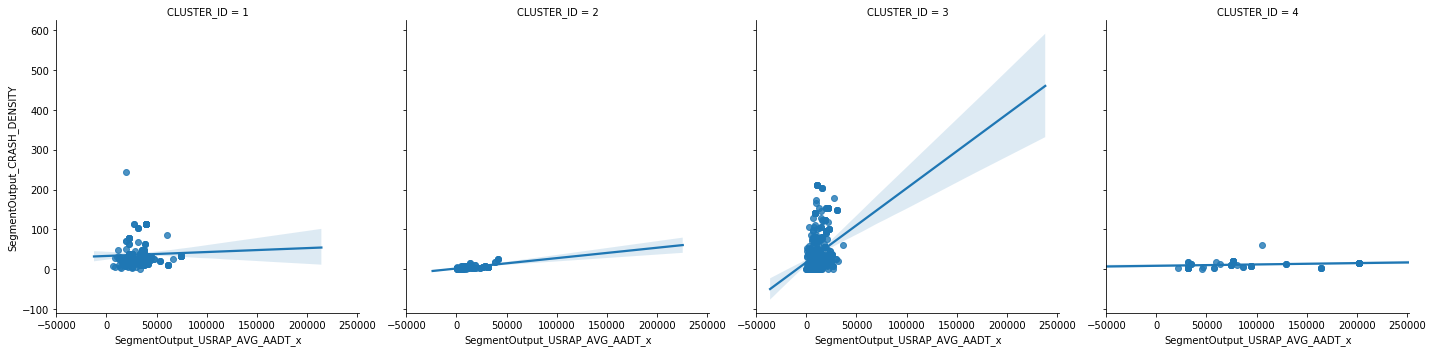

In [486]:
print("Crash-related and volume-related relationship for 'Pedestrian' category...")
get_crash_relationship_plots_by_cluster(ped_df, regline_case_field='CLUSTER_ID')

### TODO #8: Select the road segments in LOSS IV and designate these as high priority safety measurement segments

Output from TODO #7

In [487]:
# Temp Function to retrieve top percentile records using regression line
def get_crash_percentile_records_df(df, analysis_field='SegmentOutput_CRASH_DENSITY', percentile=0.8):
    
    percentile_records_df = df.loc[df[analysis_field] > df[analysis_field].quantile(percentile)]
    
    return percentile_records_df

In [488]:
mvt_df.shape

(1796, 57)

In [489]:
loss4_mvt_df = get_crash_percentile_records_df(mvt_df, percentile=0.95)
loss4_ped_df = get_crash_percentile_records_df(ped_df, percentile=0.95)
loss4_tree_df = get_crash_percentile_records_df(tree_df, percentile=0.95)

In [548]:
loss4_mvt_map = gis.map("Maryland")
loss4_mvt_map.basemap = 'gray'
loss4_mvt_df.spatial.plot(map_widget=loss4_mvt_map, cmap="Dark2")
loss4_mvt_map

MapView(layout=Layout(height='400px', width='100%'))

In [549]:
loss4_ped_map = gis.map("Maryland")
loss4_ped_map.basemap = 'gray'
loss4_ped_df.spatial.plot(map_widget=loss4_ped_map, cmap="Dark2")
loss4_ped_map

MapView(layout=Layout(height='400px', width='100%'))

In [550]:
loss4_tree_map = gis.map("Maryland")
loss4_tree_map.basemap = 'gray'
loss4_tree_df.spatial.plot(map_widget=loss4_tree_map, cmap="Dark2")
loss4_tree_map

MapView(layout=Layout(height='400px', width='100%'))

##### <<<< START Single sequence test >>>>

In [493]:
corr_matrix = merged_routes_df.loc[merged_routes_df['CLUSTER_ID']==1].corr()
corr_matrix

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,SegmentOutput_CRASH_2012,SegmentOutput_CRASH_2013,...,is_urban_x,SOURCE_ID,is_divided_y,is_urban_y,has_access_control_y,SegmentOutput_USRAP_AVG_AADT_y,SegmentOutput_USRAP_LANES_y,SegmentOutput_USRAP_SPEED_LIMIT_y,CLUSTER_ID,IS_SEED
OBJECTID,1.000000,-0.054999,0.013280,-0.054214,-0.036288,0.102436,0.117942,0.091539,0.072784,0.098305,...,NaN,1.000000,NaN,NaN,-0.033633,0.000773,0.011696,-0.000213,NaN,NaN
Routes_FHWACrashRate_MVT_ADT,-0.054999,1.000000,-0.191929,0.160158,-0.147419,0.013744,0.033315,0.023993,0.032153,-0.003481,...,NaN,-0.054999,NaN,NaN,0.027801,0.322932,0.192900,0.028297,NaN,NaN
Routes_FHWACrashRate_MVT_ROUTET,0.013280,-0.191929,1.000000,-0.139790,-0.048171,-0.244763,-0.253089,-0.288517,-0.248811,-0.224452,...,NaN,0.013280,NaN,NaN,-0.013799,-0.412751,-0.311714,-0.141238,NaN,NaN
Routes_FHWACrashRate_MVT_c_freq,-0.054214,0.160158,-0.139790,1.000000,0.260819,-0.020745,-0.002367,-0.014415,-0.018808,-0.017273,...,NaN,-0.054214,NaN,NaN,-0.001312,0.090203,0.059455,-0.065102,NaN,NaN
Routes_FHWACrashRate_MVT_c_rate,-0.036288,-0.147419,-0.048171,0.260819,1.000000,0.005899,0.015350,0.019666,-0.004169,0.014366,...,NaN,-0.036288,NaN,NaN,0.037361,0.074003,0.107794,0.041732,NaN,NaN
SegmentOutput_AVG_CRASH,0.102436,0.013744,-0.244763,-0.020745,0.005899,1.000000,0.902680,0.949715,0.963660,0.971633,...,NaN,0.102436,NaN,NaN,-0.030449,0.439835,0.285494,0.309835,NaN,NaN
SegmentOutput_CRASH_2010,0.117942,0.033315,-0.253089,-0.002367,0.015350,0.902680,1.000000,0.850032,0.841272,0.841245,...,NaN,0.117942,NaN,NaN,-0.021461,0.391855,0.205094,0.312463,NaN,NaN
SegmentOutput_CRASH_2011,0.091539,0.023993,-0.288517,-0.014415,0.019666,0.949715,0.850032,1.000000,0.910750,0.890630,...,NaN,0.091539,NaN,NaN,0.020578,0.496368,0.314594,0.300527,NaN,NaN
SegmentOutput_CRASH_2012,0.072784,0.032153,-0.248811,-0.018808,-0.004169,0.963660,0.841272,0.910750,1.000000,0.925264,...,NaN,0.072784,NaN,NaN,-0.044123,0.455661,0.324939,0.303413,NaN,NaN
SegmentOutput_CRASH_2013,0.098305,-0.003481,-0.224452,-0.017273,0.014366,0.971633,0.841245,0.890630,0.925264,1.000000,...,NaN,0.098305,NaN,NaN,-0.035306,0.423116,0.298109,0.316348,NaN,NaN


In [494]:
corr_matrix.loc['SegmentOutput_CRASH_DENSITY', 'SegmentOutput_USRAP_AVG_AADT_x']

0.6009962131107629

In [495]:
merged_routes_df['SegmentOutput_CRASH_DENSITY'].describe()

count    1796.000000
mean       19.954141
std        31.440564
min         0.000000
25%         2.948990
50%         7.848750
75%        23.158630
max       243.822030
Name: SegmentOutput_CRASH_DENSITY, dtype: float64

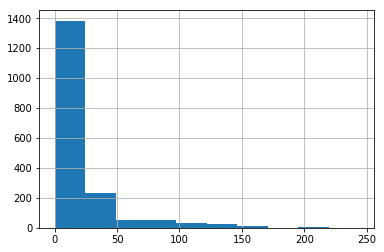

In [496]:
merged_routes_df['SegmentOutput_CRASH_DENSITY'].hist()

In [497]:
loss4_routes_df = merged_routes_df.loc[merged_routes_df['SegmentOutput_CRASH_DENSITY'] > merged_routes_df['SegmentOutput_CRASH_DENSITY'].quantile(0.95)]
loss4_routes_df

,OBJECTID,Routes_FHWACrashRate_MVT_ADT,Routes_FHWACrashRate_MVT_ROUTET,Routes_FHWACrashRate_MVT_ROUTE_,Routes_FHWACrashRate_MVT_c_freq,Routes_FHWACrashRate_MVT_c_rate,SHAPE,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_2010,SegmentOutput_CRASH_2011,...,is_urban_x,SOURCE_ID,is_divided_y,is_urban_y,has_access_control_y,SegmentOutput_USRAP_AVG_AADT_y,SegmentOutput_USRAP_LANES_y,SegmentOutput_USRAP_SPEED_LIMIT_y,CLUSTER_ID,IS_SEED
68,69,631.0,2,YORK RD ...,0.072977,0.316858,"{'paths': [[[1409911.7136, 724973.6853], [1409...",128.6,99,123,...,1,69,0,1,0,18387.0,4,35,2,0
92,93,1843.0,2,YORK RD ...,0.069749,0.103686,"{'paths': [[[1411532.6747, 742581.854800001], ...",128.6,99,123,...,1,93,0,1,0,18387.0,4,35,2,0
113,114,5000.0,2,PULASKI HWY ...,0.125447,0.068738,"{'paths': [[[1474176.9891, 624570.327300001], ...",58.8,50,52,...,1,114,0,1,0,39593.3,6,30,2,0
115,116,3491.0,2,WASHINGTON BLVD ...,0.125267,0.098309,"{'paths': [[[1396822.4857, 566223.2412], [1396...",78.4,60,61,...,1,116,0,1,0,8998.8,3,25,2,0
124,125,5010.0,2,WASHINGTON BLVD ...,0.042850,0.023432,"{'paths': [[[1398707.514, 568563.1054], [13987...",78.4,60,61,...,1,125,0,1,0,8998.8,3,25,2,0
128,129,3740.0,2,BELAIR RD ...,0.088689,0.064969,"{'paths': [[[1446981.3893, 617363.7689], [1447...",128.8,92,131,...,1,129,0,1,0,21560.0,4,30,2,0
146,147,2330.0,2,BELAIR RD ...,0.108203,0.127230,"{'paths': [[[1449776.2546, 620566.723499998], ...",128.8,92,131,...,1,147,0,1,0,21560.0,4,30,2,0
156,157,4090.0,2,BELAIR RD ...,0.111539,0.074715,"{'paths': [[[1476741.1863, 649859.186000001], ...",128.8,92,131,...,1,157,0,1,0,21560.0,4,30,2,0
202,203,6973.2,2,PULASKI HWY ...,0.134757,0.052945,"{'paths': [[[1649408.2548, 706707.724300001], ...",58.8,50,52,...,1,203,0,1,0,39593.3,6,30,2,0
234,235,18122.8,2,BELAIR RD ...,0.265825,0.040186,"{'paths': [[[1479347.2424, 659608.068500001], ...",128.8,92,131,...,1,235,0,1,0,21560.0,4,30,2,0


In [498]:
loss4_map = gis.map("Maryland")
loss4_map.basemap = 'gray'
loss4_routes_df.spatial.plot(map_widget=loss4_map)
loss4_map

MapView(layout=Layout(height='400px', width='100%'))

##### <<<< END Single sequence test >>>>

## <span style="color:Navy">Step 3: </span><span>Diagnose and Solve</span>

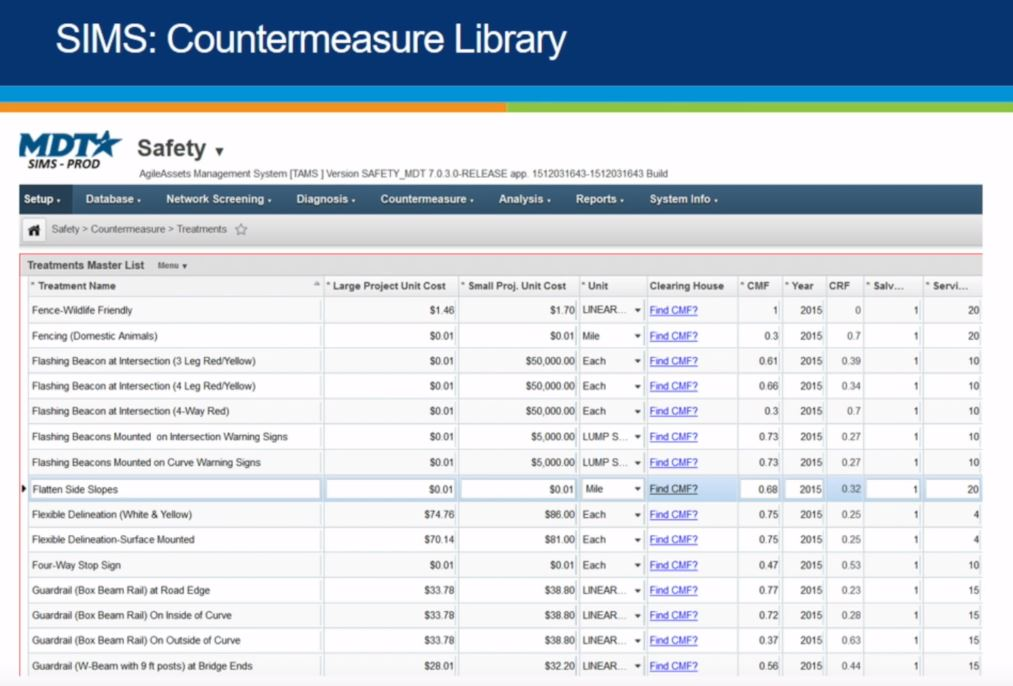

### How do we apply the right one of these...

In [499]:
cmf_xls = r'/arcgis/home/anieto/data/cmf_listings.xls'
cmf_df = pd.read_excel(cmf_xls)
cmf_df.head()

,CMF ID,Study Title,Countermeasure Category,Countermeasure Subcategory,Countermeasure,CRF,CMF,Crash Type,KABCO Crash Severity,Roadway Type,...,Maximum Minor Road Traffic Volume (intersection),Number of Lanes,Intersection Type,Intersection Geometry,Traffic Control Type,Speed Limit (mph),Crash Time of Day,Roadway Division Type,Date CMF Added to Clearinghouse,Public Comments
0,1,Lane Width and Safety,Roadway,Lane width,Decrease lane width from 11 feet to 9 feet,-21.0,1.21,All,All,Not specified,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN
1,2,Lane Width and Safety,Roadway,Lane width,Decrease lane width from 11 feet to 10 feet,-9.0,1.09,All,All,Not specified,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN
2,3,Lane Width and Safety,Roadway,Lane width,Increase lane width from 11 feet to 12 feet,5.0,0.95,All,All,Not specified,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN
3,4,Safety Effects of Using Narrow Lanes and Shoul...,Roadway,Number of lanes,Four to five lane conversion,-11.0,1.11,All,All,Principal Arterial Other Freeways and Expressways,...,NaN,4 (one direction),NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,AADT is one direction
4,5,Safety Effects of Using Narrow Lanes and Shoul...,Roadway,Number of lanes,Four to five lane conversion,-10.0,1.10,All,"A (serious injury),B (minor injury),C (possibl...",Principal Arterial Other Freeways and Expressways,...,NaN,4 (one direction),NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,AADT is one direction


### ... to each of these?

In [500]:
loss4_tree_map = gis.map("Maryland")
loss4_tree_map.basemap = 'gray'
loss4_tree_df.spatial.plot(map_widget=loss4_tree_map, cmap="Dark2")
loss4_tree_map

MapView(layout=Layout(height='400px', width='100%'))

#### Applying CMFs basic guidelines:
http://www.cmfclearinghouse.org/collateral/fhwasa17007.pdf

### TODO #9: Build GIS/Python dataset of CMFs

Data: CMF excel from CMF Clearinghouse

Add webpage field to table of CMFs

In [501]:
# CMF Clearinghouse base URL
cmf_base_webpage = "http://www.cmfclearinghouse.org/detail.cfm?facid={0}"
countermeasures_webpage_field = "CMF Webpage"
countermeasures_id_field = "CMF ID"

In [502]:
# Helper function to retrieve the countermeasure summary information
def get_cmf_webpage_from_id(countermeasure_id, cmf_base_webpage=cmf_base_webpage):
    webpage = cmf_base_webpage.format(str(countermeasure_id))
    return webpage

In [503]:
cmf_df[countermeasures_webpage_field] = cmf_df.apply(lambda x: get_cmf_webpage_from_id(x[countermeasures_id_field]), axis=1)
cmf_df.head()

,CMF ID,Study Title,Countermeasure Category,Countermeasure Subcategory,Countermeasure,CRF,CMF,Crash Type,KABCO Crash Severity,Roadway Type,...,Number of Lanes,Intersection Type,Intersection Geometry,Traffic Control Type,Speed Limit (mph),Crash Time of Day,Roadway Division Type,Date CMF Added to Clearinghouse,Public Comments,CMF Webpage
0,1,Lane Width and Safety,Roadway,Lane width,Decrease lane width from 11 feet to 9 feet,-21.0,1.21,All,All,Not specified,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN,http://www.cmfclearinghouse.org/detail.cfm?fac...
1,2,Lane Width and Safety,Roadway,Lane width,Decrease lane width from 11 feet to 10 feet,-9.0,1.09,All,All,Not specified,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN,http://www.cmfclearinghouse.org/detail.cfm?fac...
2,3,Lane Width and Safety,Roadway,Lane width,Increase lane width from 11 feet to 12 feet,5.0,0.95,All,All,Not specified,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,NaN,http://www.cmfclearinghouse.org/detail.cfm?fac...
3,4,Safety Effects of Using Narrow Lanes and Shoul...,Roadway,Number of lanes,Four to five lane conversion,-11.0,1.11,All,All,Principal Arterial Other Freeways and Expressways,...,4 (one direction),NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,AADT is one direction,http://www.cmfclearinghouse.org/detail.cfm?fac...
4,5,Safety Effects of Using Narrow Lanes and Shoul...,Roadway,Number of lanes,Four to five lane conversion,-10.0,1.10,All,"A (serious injury),B (minor injury),C (possibl...",Principal Arterial Other Freeways and Expressways,...,4 (one direction),NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01,AADT is one direction,http://www.cmfclearinghouse.org/detail.cfm?fac...


Add state field to the segments dataframes

In [504]:
lossIV_dfs_list = [loss4_mvt_df, loss4_ped_df, loss4_tree_df]
for lossIV_df in lossIV_dfs_list:
    if 'State' not in lossIV_df.columns.tolist():
        lossIV_df['State'] = 'MD'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [505]:
loss4_mvt_df['Crash_Type'] = "Motor Vehicle in Transport"
loss4_ped_df['Crash_Type'] = "Pedestrian"
loss4_tree_df['Crash_Type'] = "Tree (Standing Only)"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

### TODO #10: For each multivariate clustering group, determine which CMFs are applicable

Data: Output from TODO #5 and TODO #9

Output: Lookup table for each multivariate group and CMFs available

#### How do we select the most appropriate CMF?

A search for CMFs will often return multiple results, sometimes hundreds of CMFs. Even after identifying a particular countermeasure of interest, a user must often make a decision about which CMF under that countermeasure to select and use.

Selecting a CMF by Matching on Major Factors
The primary goal is to select a CMF that was developed under the same conditions as the site of interest to which it will be applied. A user must examine the information related to the applicability of the CMFs to determine how they differ. Some major characteristics are shown on the search results page (i.e., crash type, crash severity, roadway type, and area type). More characteristics can be seen by viewing the CMF details page.

##### Set up countermeasure search parameters

In [506]:
limit_to_state_countermeasures = False

limit_to_applicable_area_type = True

limit_to_applicable_lane_count = True

limit_to_applicable_division_type = True

##### Set up segment and countermeasure schema

In [507]:
segment_state_field = "State"
segment_area_type_field = "SegmentOutput_USRAP_AREA_TYPE"
segment_lane_count_field = "SegmentOutput_USRAP_LANES_x"
segment_median_field = "SegmentOutput_USRAP_MEDIAN"
segment_crash_type_field = "Crash_Type"
segment_traffic_volume_field = "SegmentOutput_USRAP_AVG_AADT_x"
segment_crash_rate_field = "SegmentOutput_CRASH_RATE"
segment_crash_density_field = "SegmentOutput_CRASH_DENSITY_RIS"
segment_avg_crash_field = "SegmentOutput_AVG_CRASH"

In [508]:
# Genreal countermeasure descriptions
countermeasures_state_field = "State"
countermeasures_area_type_field = "Area Type"
countermeasures_lane_count_field = "Number of Lanes"
countermeasures_median_field = "Roadway Division Type"

# Categories to determine crash type
countermeasures_id_field = "CMF ID"
countermeasures_category_field = "Countermeasure Category"
countermeasures_subcategory_field = "Countermeasure Subcategory"
countermeasures_name_field = "Countermeasure"
countermeasures_crash_type = "Crash Type"

# Categories to determine traffic volume
countermeasures_max_volume_field = "Maximum Traffic Volume (non-intersection)"
countermeasures_min_volume_field = "Minimum Traffic Volume (non-intersection)"

# Categories to determine effectiveness of countermeasure
countermeasures_ranking_field = "Star Quality Rating"
countermeasures_cmf_field = "CMF"

##### Set up helper functions

In [509]:
def get_applicable_state_countermeasure_values(state_value, countermeasures_df, countermeasures_state_field=countermeasures_state_field):
    applicable_value_list = [item for item in countermeasures_df[countermeasures_state_field].unique().tolist() if state_value in str(item).split(",") and isinstance(item, str)]
    return applicable_value_list

In [510]:
# Test function: pass a state abbreviation
get_applicable_state_countermeasure_values("MD", cmf_df)

['AZ,CA,FL,KS,LA,MD,MA,MO,NC,OH,OR,PA,TX,UT,WA,WI',
 'AZ,CA,CO,CT,DE,ID,IL,IN,ME,MD,MA,MI,MS,NE,NJ,NM,OH,OK,TN,TX,VA,WV',
 'MD',
 'CA,CO,DE,MD,MN,OR,PA,WA',
 'CA,MD,AZ,IL,TX,OR,NC,OH,DC,AK,VA,CO,AL,ID,MA,NY,MI,IN',
 'CO,FL,IN,MD,MI,NY,NC,SC,VT,WA',
 'CA,MD',
 'KS,MD,MN,OR,WA,WI',
 'AZ,CA,CO,DC,FL,IA,MD,MO,NM,NC,OR,TX',
 'AZ,CA,CO,DC,FL,IA,MD,MN,MO,NM,NC,OR,TX']

In [511]:
def get_applicable_area_type_countermeasure_values(area_type_value, countermeasures_df, countermeasures_area_type_field=countermeasures_area_type_field):
    wildcard_values = ["Not specified", "Not Specified", "All", float("nan")]
    
    applicable_value_list = [item for item in countermeasures_df[countermeasures_area_type_field].unique().tolist() if area_type_value.lower() in str(item).lower().split(" ")]
    applicable_value_list.extend(wildcard_values)
    
    return applicable_value_list

In [512]:
# Test function: pass "Urban", "Suburban", or "Rural"
get_applicable_area_type_countermeasure_values("Urban", cmf_df)

['Urban',
 'Urban and Suburban',
 'Urban and suburban',
 'Not specified',
 'Not Specified',
 'All',
 nan]

In [513]:
def get_applicable_lane_countermeasure_values(number_of_lanes, countermeasures_df, countermeasures_lanes_field=countermeasures_lane_count_field, include_date_vals=True):
    
    single_lane_wildcard_vals = [float("nan"), "Single", "one"]
    multilane_wildcard_vals = [float("nan"), "Multilane", "Var.", "multi", "multilane", "Multi"]
    
    if number_of_lanes == 1:
        applicable_value_list = single_lane_wildcard_vals
        appended_list = [item for item in countermeasures_df[countermeasures_lanes_field].unique().tolist() if "1" in str(item).split(" ")]
        applicable_value_list.extend(appended_list)
        
    elif number_of_lanes > 1:
        applicable_value_list = multilane_wildcard_vals
        appended_list = [item for item in countermeasures_df[countermeasures_lanes_field].unique().tolist() if str(number_of_lanes) in str(item).split(" ")]
        applicable_value_list.extend(appended_list)
    
    if include_date_vals:
        applicable_value_list.extend([item for item in countermeasures_df[countermeasures_lanes_field].unique().tolist() if isinstance(item, datetime.date)])
        
    return applicable_value_list

In [514]:
# Test function: pass a number of lanes
get_applicable_lane_countermeasure_values(4, cmf_df)

[nan,
 'Multilane',
 'Var.',
 'multi',
 'multilane',
 'Multi',
 '4 (one direction)',
 4,
 '4 to 8',
 '2 to 4',
 '1 to 4',
 '4 to 6',
 '3 to 4',
 '4 to 6+',
 '4 (in one direction)',
 '4 to 10',
 '4 and 6',
 datetime.datetime(2019, 2, 4, 0, 0),
 datetime.datetime(2006, 2, 4, 0, 0),
 datetime.datetime(2019, 2, 3, 0, 0),
 datetime.datetime(2019, 2, 7, 0, 0),
 datetime.datetime(2019, 4, 6, 0, 0),
 datetime.datetime(2019, 2, 8, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 3, 6, 0, 0),
 datetime.datetime(2019, 2, 5, 0, 0),
 datetime.datetime(2019, 3, 31, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 6, 10, 0, 0),
 datetime.datetime(2019, 4, 10, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 2, 10, 0, 0),
 datetime.datetime(2019, 2, 6, 0, 0)]

In [515]:
def get_applicable_median_countermeasure_values(segment_value, countermeasures_df, countermeasures_median_field=countermeasures_median_field, include_twltl=True):
    wildcard_values = [float("nan"), "All"]
    if include_twltl:
        wildcard_values.append("Divided by TWLTL")
    
    if segment_value == "Undivided Roadway":
        applicable_value_list = ["Undivided"]
    elif segment_value == "Divided Roadway":
        applicable_value_list = ["Divided", "Divided by Median"]
    else:
        print("WARNING: An unexpected segment median value was passed. Please confirm that this segment is has a median value of 'Undivided Roadway' or 'Divided Roadway'.")
        applicable_value_list = []
    
    applicable_value_list.extend(wildcard_values)
    return applicable_value_list

In [516]:
# Test function: pass 'Undivided Roadway' or 'Divided Roadway'
get_applicable_median_countermeasure_values("Divided Roadway", cmf_df)

['Divided', 'Divided by Median', nan, 'All', 'Divided by TWLTL']

In [517]:
def get_applicable_crash_type_countermeasure_values(segment_value, 
                                                    countermeasures_df, 
                                                    countermeasures_category_field=countermeasures_category_field, 
                                                    countermeasures_subcategory_field=countermeasures_subcategory_field):
    wildcard_values = []
    
    if segment_value == "Motor Vehicle in Transport":
        applicable_value_list = ["Roadway", "Access management", "Signs", "Advanced technology and ITS", "Delineation", "Speed management", "Highway lighting", "Interchange design"]
        
    elif segment_value == "Pedestrian":
        applicable_value_list = ["Pedestrian", "Advanced technology and ITS"]
        
    elif segment_value == "Tree (Standing Only)":
        applicable_value_list = ["Shoulder treatments", "Roadside", "Alignment", "Delineation", "Speed management", "Highway lighting"]
        
    else:
        print("WARNING: An unexpected segment crash type value was passed. Please confirm that this segment can be processed.")
        applicable_value_list = []
    
    applicable_value_list.extend(wildcard_values)
    return applicable_value_list

In [518]:
# Test function: pass 'Motor Vehicle in Transport', 'Pedestrian', or 'Tree (Standing Only)'
# get_applicable_crash_type_countermeasure_values("Motor Vehicle in Transport", cmf_df)
get_applicable_crash_type_countermeasure_values("Pedestrian", cmf_df)
# get_applicable_crash_type_countermeasure_values("Tree (Standing Only)", cmf_df)

['Pedestrian', 'Advanced technology and ITS']

In [519]:
def get_applicable_countermeasures_for_segment(segment_record, applicable_countermeasures_df, 
                                               
                                               segment_state_field = segment_state_field,
                                               segment_area_type_field = segment_area_type_field,
                                               segment_lane_count_field = segment_lane_count_field,
                                               segment_median_field = segment_median_field,
                                               segment_crash_type_field = segment_crash_type_field,
                                               segment_traffic_volume_field = segment_traffic_volume_field,
                                               
                                               countermeasures_state_field=countermeasures_state_field,
                                               countermeasures_area_type_field=countermeasures_area_type_field,
                                               countermeasures_lane_count_field=countermeasures_lane_count_field,
                                               countermeasures_median_field=countermeasures_median_field,
                                               countermeasures_category_field=countermeasures_category_field,
                                               
                                               limit_to_state_countermeasures=False, 
                                               limit_to_applicable_area_type=True, 
                                               limit_to_applicable_lane_count=True, 
                                               limit_to_applicable_division_type=True,
                                               limit_to_applicable_crash_type=True,
                                               
                                               verbose=True
                                              ):
    
    if isinstance(segment_record, pd.DataFrame):
        segment_record = segment_record.iloc[0]
    
    if limit_to_state_countermeasures:
        
        if verbose: print("\nDetermining state limitations...")
        pre_count = applicable_countermeasures_df.shape[0]
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_state_field].isin(get_applicable_state_countermeasure_values(segment_record[segment_state_field], applicable_countermeasures_df))]
        post_count = applicable_countermeasures_df.shape[0]
        if verbose: print("{0} of {1} total countermeasures applicable based on state.".format(str(post_count), str(pre_count)))
        
    if limit_to_applicable_area_type:
        
        if verbose: print("\nDetermining applicable area limitations...")
        pre_count = applicable_countermeasures_df.shape[0]
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_area_type_field].isin(get_applicable_area_type_countermeasure_values(segment_record[segment_area_type_field], applicable_countermeasures_df))]
        post_count = applicable_countermeasures_df.shape[0]
        if verbose: print("{0} of {1} total countermeasures applicable based on area type.".format(str(post_count), str(pre_count)))  
        
    if limit_to_applicable_lane_count:
        
        if verbose: print("\nDetermining applicable lane count limitations...")
        pre_count = applicable_countermeasures_df.shape[0]
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_lane_count_field].isin(get_applicable_lane_countermeasure_values(segment_record[segment_lane_count_field], applicable_countermeasures_df))]
        post_count = applicable_countermeasures_df.shape[0]
        if verbose: print("{0} of {1} total countermeasures applicable based on lane count.".format(str(post_count), str(pre_count)))
        
    if limit_to_applicable_division_type:
        
        if verbose: print("\nDetermining applicable road division limitations...")
        pre_count = applicable_countermeasures_df.shape[0]
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_median_field].isin(get_applicable_median_countermeasure_values(segment_record[segment_median_field], applicable_countermeasures_df))]
        post_count = applicable_countermeasures_df.shape[0]
        if verbose: print("{0} of {1} total countermeasures applicable based on road division.".format(str(post_count), str(pre_count)))     
        
    if limit_to_applicable_crash_type:
        
        if verbose: print("\nDetermining applicable crash type limitations...")
        pre_count = applicable_countermeasures_df.shape[0]
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_category_field].isin(get_applicable_crash_type_countermeasure_values(segment_record[segment_crash_type_field], applicable_countermeasures_df))]
        post_count = applicable_countermeasures_df.shape[0]
        if verbose: print("{0} of {1} total countermeasures applicable based on crash type.".format(str(post_count), str(pre_count)))   
    
    print("\n<<< {0} total countermeasures applicable based on segment characteristics. >>>".format(str(post_count)))
    
    return applicable_countermeasures_df

In [520]:
# Test function: Pass segment record and get applicable countermeasures
segment_record = loss4_ped_df.iloc[0:1]
test_cmfs_df = get_applicable_countermeasures_for_segment(segment_record, cmf_df, limit_to_state_countermeasures=False, verbose=True)


Determining applicable area limitations...
3963 of 6916 total countermeasures applicable based on area type.

Determining applicable lane count limitations...
741 of 3963 total countermeasures applicable based on lane count.

Determining applicable road division limitations...
284 of 741 total countermeasures applicable based on road division.

Determining applicable crash type limitations...
0 of 284 total countermeasures applicable based on crash type.

<<< 0 total countermeasures applicable based on segment characteristics. >>>


In [539]:
def get_segment_map_and_countermeasures(segment_iloc, segments_df, countermeasures_df, 
                                        map_location="Maryland", basemap='gray', colors='Dark2', line_width=0.5, symbol_style='s',
                                        limit_to_state_countermeasures=False, 
                                        limit_to_applicable_area_type=True, 
                                        limit_to_applicable_lane_count=True, 
                                        limit_to_applicable_division_type=True,
                                        limit_to_applicable_crash_type=True,
                                        limit_to_applicable_cmf_above_zero=True,
                                        filter_pedestrian_cmfs=False,
                                        display_output=True, num_of_cmfs_to_display=1, 
                                        only_show_summary_segment_fields=True, only_show_summary_cmf_fields=True, 
                                        sort_cmfs=True, sort_priority="Star Rating", 
                                        verbose=False):
        
    summary_segment_fields = [segment_area_type_field, 
                              segment_crash_type_field, 
                              segment_lane_count_field, 
                              segment_median_field, 
                              segment_traffic_volume_field,
                              segment_avg_crash_field,
                              segment_crash_rate_field]
    
    summary_cmf_fields = [countermeasures_id_field, 
                          countermeasures_category_field, countermeasures_subcategory_field, countermeasures_name_field, 
                          countermeasures_ranking_field, countermeasures_cmf_field, countermeasures_webpage_field]
    
    segment_df = segments_df.iloc[segment_iloc: segment_iloc+1]
    
    web_map = gis.map(map_location)
    web_map.basemap = basemap
    segment_df.spatial.plot(map_widget=web_map, cmap=colors, line_width=line_width, symbol_style=symbol_style)
    
    if display_output:
        print("\nSegment:")
        display(segment_df[summary_segment_fields], web_map)
    
    applicable_countermeasures_df = get_applicable_countermeasures_for_segment(segment_df, countermeasures_df,
                                                                               limit_to_state_countermeasures=limit_to_state_countermeasures, 
                                                                               limit_to_applicable_area_type=limit_to_applicable_area_type, 
                                                                               limit_to_applicable_lane_count=limit_to_applicable_lane_count, 
                                                                               limit_to_applicable_division_type=limit_to_applicable_division_type,
                                                                               limit_to_applicable_crash_type=limit_to_applicable_crash_type,
                                                                               verbose=verbose)
    if limit_to_applicable_cmf_above_zero:
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_cmf_field] > 0]
        
    if filter_pedestrian_cmfs:
        applicable_countermeasures_df = applicable_countermeasures_df.loc[applicable_countermeasures_df[countermeasures_category_field]=="Pedestrians"]
    
    if sort_cmfs:
        if sort_priority == "Star Rating":
            applicable_countermeasures_df = applicable_countermeasures_df.sort_values([countermeasures_ranking_field, countermeasures_cmf_field], ascending=[False, True])
        elif sort_priority == "CMF":
            applicable_countermeasures_df = applicable_countermeasures_df.sort_values([countermeasures_cmf_field, countermeasures_ranking_field], ascending=[True, False])
        else:
            print("Select a sorting priority.")
        
    def make_clickable(val):
        # target _blank to open new window
        return '<a target="_blank" href="{}">{}</a>'.format(val, val)
    
    if display_output:
        print("\nTop {0} selected countermeasures for segment:".format(num_of_cmfs_to_display))
        display(applicable_countermeasures_df.head(num_of_cmfs_to_display)[summary_cmf_fields].style.format({countermeasures_webpage_field: make_clickable}))
    
    return web_map, segment_df, applicable_countermeasures_df

In [551]:
# Test function: pass an index number corresponding to the segment ID we want to get a map for and applicable countermeasures
# web_map, segment_df, applicable_cmfs_df = get_segment_map_and_countermeasures(1, loss4_mvt_df, cmf_df, basemap='gray', colors='cool', limit_to_applicable_crash_type=False)
web_map, segment_df, applicable_cmfs_df = get_segment_map_and_countermeasures(0, loss4_ped_df.loc[loss4_ped_df['Shape__Length'] < 2000], cmf_df, basemap='gray', colors='cool', line_width=8, limit_to_applicable_crash_type=False, filter_pedestrian_cmfs=True)


Segment:


,SegmentOutput_USRAP_AREA_TYPE,Crash_Type,SegmentOutput_USRAP_LANES_x,SegmentOutput_USRAP_MEDIAN,SegmentOutput_USRAP_AVG_AADT_x,SegmentOutput_AVG_CRASH,SegmentOutput_CRASH_RATE
177,Urban,Pedestrian,4,Undivided Roadway,30340.2,98.4,270.18074


MapView(layout=Layout(height='400px', width='100%'))


<<< 284 total countermeasures applicable based on segment characteristics. >>>

Top 1 selected countermeasures for segment:


,CMF ID,Countermeasure Category,Countermeasure Subcategory,Countermeasure,Star Quality Rating,CMF,CMF Webpage
1539,2911,Pedestrians,None,Install a pedestrian hybrid beacon (PHB or HAWK),4,0.712,http://www.cmfclearinghouse.org/detail.cfm?facid=2911


In [552]:
web_map.basemap = 'hybrid'

In [553]:
web_map.add_layer(crashes_maryland_item)

In [525]:
crashes_fars_sedf.loc[crashes_fars_sedf[type_field]=='Pedestrian'].spatial.plot(map_widget=web_map, colors="inferno")

True

In [526]:
applicable_cmfs_df.groupby(['Countermeasure Category']).agg(['count'])

,CMF ID,Study Title,Countermeasure Subcategory,Countermeasure,CRF,CMF,Crash Type,KABCO Crash Severity,Roadway Type,Area Type,...,Number of Lanes,Intersection Type,Intersection Geometry,Traffic Control Type,Speed Limit (mph),Crash Time of Day,Roadway Division Type,Date CMF Added to Clearinghouse,Public Comments,CMF Webpage
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Countermeasure Category,,,,,,,,,,,,,,,,,,,,,
Pedestrians,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [527]:
applicable_cmfs_df.loc[applicable_cmfs_df[countermeasures_category_field] == 'Pedestrians']

,CMF ID,Study Title,Countermeasure Category,Countermeasure Subcategory,Countermeasure,CRF,CMF,Crash Type,KABCO Crash Severity,Roadway Type,...,Number of Lanes,Intersection Type,Intersection Geometry,Traffic Control Type,Speed Limit (mph),Crash Time of Day,Roadway Division Type,Date CMF Added to Clearinghouse,Public Comments,CMF Webpage
1539,2911,Safety Effectiveness of the HAWK Pedestrian Cr...,Pedestrians,None,Install a pedestrian hybrid beacon (PHB or HAWK),29.0,0.712,All,All,Not Specified,...,4 to 6,Roadway/roadway (not interchange related),"3-leg,4-leg",Other,30 to 40 mph,All,All,2011-03-21,The authors of this study also experimented wi...,http://www.cmfclearinghouse.org/detail.cfm?fac...
1550,2922,Safety Effectiveness of the HAWK Pedestrian Cr...,Pedestrians,None,Install a pedestrian hybrid beacon (PHB or HAWK),69.0,0.309,Vehicle/pedestrian,All,Not Specified,...,4 to 6,Roadway/roadway (not interchange related),"3-leg,4-leg",Other,30 to 40 mph,All,All,2011-03-21,The authors of this study also experimented wi...,http://www.cmfclearinghouse.org/detail.cfm?fac...
1545,2917,Safety Effectiveness of the HAWK Pedestrian Cr...,Pedestrians,None,Install a pedestrian hybrid beacon (PHB or HAWK),15.0,0.849,All,"K (fatal),A (serious injury),B (minor injury),...",Not Specified,...,4 to 6,Roadway/roadway (not interchange related),"3-leg,4-leg",Other,30 to 40 mph,All,All,2011-03-21,The authors of this study also experimented wi...,http://www.cmfclearinghouse.org/detail.cfm?fac...


### TODO #11: For each segment, assign safety measure based on CMF value, star quality rating, and cost 

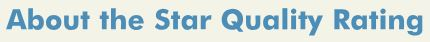

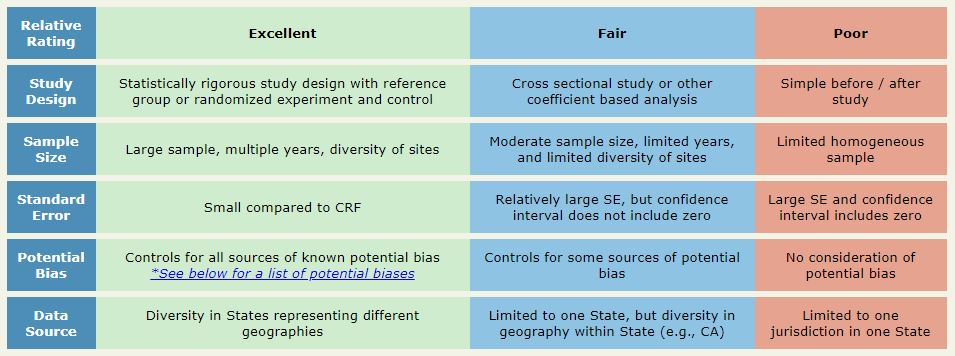

In [528]:
sorted_cmf_df = cmf_df.sort_values('CMF', ascending=False)
sorted_cmf_df.head().iloc[0]

CMF ID                                                                                             9468
Study Title                                           Safety Effects of Different Driveway Types Def...
Countermeasure Category                                                               Access management
Countermeasure Subcategory                                                                         None
Countermeasure                                                                     Change driveway type
CRF                                                                                             -1854.5
CMF                                                                                              19.545
Crash Type                                            Angle,Fixed object,Left turn,Rear end,Vehicle/...
KABCO Crash Severity                                                                                All
Roadway Type                                                    